---
# **Bank Fraud Detection and Analysis**

---
# **Objective**

- The primary objective of this project is to **detect fraudulent bank transactions** within a dataset of 2,500 records using a robust combination of machine learning and statistical techniques, and to **provide an automated framework capable of making real-time predictions on new transactions**. This includes integrating a well-trained predictive model that classifies unseen transactions as either "Fraud" or "Non-Fraud" based on learned patterns and features.

Major Steps Undertaken

**1.   Data Loading and Initial Exploration**
  *   **Loaded and explored transaction data** to understand ranges, distributions, and the overall quality of the dataset.
  *   Performed standard checks for missing or duplicate values, confirming data integrity and consistency for further analysis.

**2.   Feature Engineering & Preprocessing**
  *   **Extracted and transformed features:** Converted datetime columns, created new temporal features (like TimeSinceLastTransaction), and managed categorical variables via label encoding.
  *   **Outlier treatment:** Applied statistical techniques and custom capping functions to control outliers in key numeric features.
  *   **Scaling:** Standardized or normalized numeric features where appropriate to ensure uniformity for modeling.

**3.   Exploratory Data Analysis (EDA)**
  *   Conducted **univariate, bivariate, and multivariate analyses** through a series of plots (boxplots, histograms, scatterplots) to visualize relationships, distribution patterns, and outlier behavior among features.

**4.   Anomaly Detection Methods**

  *   Applied **multiple unsupervised learning methods** to flag suspicious transactions:
  *   **K-Means Clustering:** Marked points farthest from cluster centroids.
  *   **DBSCAN:** Highlighted low-density outliers.
  *   **Isolation Forest:** Isolated subtle anomalies through ensemble partitioning.
  *   **Visualization:** Used bar charts, Venn diagrams, and scatter plots to compare results and understand method overlaps.

**5.   Feature Selection**

  *   Implemented a **Chi-square test** to rigorously select important features correlated with fraudulent outcomes.
  *   **Dropped irrelevant features** to optimize model efficiency, reduce multicollinearity, and enhance interpretability.

**6.   Model Development and Validation**

  *   Utilized a **Random Forest classifier** trained on features chosen through statistical methods and compensated for class imbalance using SMOTE.
  *   Performed **model validation** with high-level metrics (accuracy, precision, recall, F1-score, MSE, R²), demonstrating exceptional fraud detection performance.
  *   Evaluated results with confusion matrices and classification reports, confirming high recall and precision with very few false positives or negatives.

**7.   Automated Fraud Prediction Pipeline**
*   Developed an **end-to-end prediction pipeline:**
*   Preprocesses any new transaction (date conversion, encoding, scaling, feature selection).
*   Passes processed features to the trained Random Forest model.
*   **Outputs an immediate, human-readable prediction,** clearly indicating if the transaction is "Fraud" or "Non-Fraud" (with bold formatting in console for clarity).
*   This prediction step fully operationalizes the learned fraud detection framework, enabling real-time, automated risk assessment for new data.


# **Load Data**
### Import suitable libraries. Fetch, scan and display relevant data

In [840]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from scipy.cluster.hierarchy import linkage, fcluster

import warnings
warnings.filterwarnings('ignore')

In [841]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [842]:
# Load the dataset

data = pd.read_csv('/content/drive/MyDrive/GT Project/1. Bank Fraud Detection - Unsupervised/bank_transactions_data_2.csv')

In [843]:
# View the dataset
data.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [844]:
# View the statistical summary
data.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

**Key Insights**

**TransactionAmount:**
- Average: 297.59, with a wide range from 0.26 to 1,919.11.
75% of transactions are below 414.53.

**CustomerAge:**
- Average age: 44.67 years, ranging from 18 to 80
Median age: 45 years

**TransactionDuration:**
- Average duration: 119.64 seconds, ranging from 10 to 300 seconds.
75% of transactions complete in under 161 seconds.

**LoginAttempts:**
- Average: 1.12 attempts, with most transactions (75%) involving only 1 attempt.
Maximum attempts: 5.

**AccountBalance:**
- Average balance: 5,114.30 dollars, ranging from 101.25 dollars to 14,977.99 dollars
Median balance: $4,735.51.

# **Clean Data**
### Scan the dataset, check for missing values, fill in the missing values or delete them if too many NaN values

In [845]:
# Check for missing values
#data.isnull().sum()
print("Missing values:\n", data.isnull().sum())

Missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [846]:
# Check for Duplicate values
data.duplicated().sum()

np.int64(0)

#### Observations :
*   After performing the check, no missing or duplicated values were found in the dataset.
*   This indicates that the data is complete and consistent, and no further cleaning is needed regarding missing or duplicate entries.



In [847]:
# View the information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [848]:
# Convert date columns to datetime format
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])

---
# **Exploratory Data Analysis (EDA)**
---

## **1. Univariate Analysis**
### Focus on analyzing a single feature at a time to understand its distribution, central tendency, and variability. Visualized with histograms, boxplots and countplots

In [851]:
# Boxplot for numeric columns only

# Select numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Apply scaling
scaler = StandardScaler()
scaled_array = scaler.fit_transform(numeric_data)

# Convert scaled array back to DataFrame
scaled_numeric_data = pd.DataFrame(scaled_array, columns=numeric_data.columns)

# Melt for Plotly boxplot (long format)
melted_scaled_df = scaled_numeric_data.melt(var_name='Feature', value_name='Scaled Value')

# Horizontal box plot of scaled data
fig = px.box(
    melted_scaled_df,
    x='Scaled Value',
    y='Feature',
    orientation='h',
    color='Feature',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Boxplot of Scaled Numeric Columns'
)

fig.update_layout(
    showlegend=False,
    height=600,
    width=1200,
    yaxis={'categoryorder':'total ascending'},
    title_x=0.5,
    font=dict(size=14)
)

fig.show()


**Key Insights**

- **AccountBalance** and **TransactionAmount** show notable skew and outliers, with AccountBalance being particularly broad.

- Other features (**CustomerAge, TransactionDuration, LoginAttempts**) are tightly clustered with minimal outliers, indicating uniformity in those behaviors for most customers.

- Outliers in these features could warrant further investigation, as they may indicate unusual customer behavior or potential fraud scenarios.

In [714]:
# Step 1: Identify numeric and categorical columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

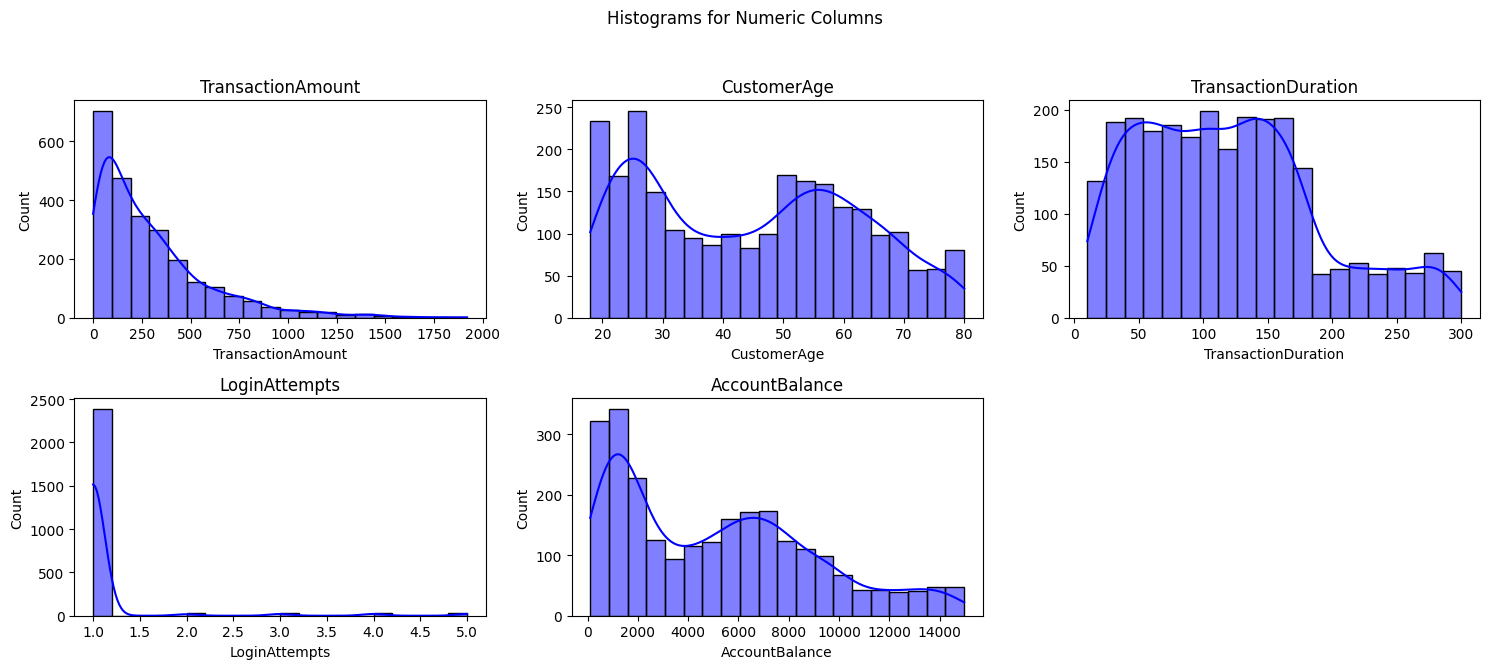

In [715]:
# Step 2: PLot Histogram
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = len(numeric_cols)
rows = num_cols // 3 + (num_cols % 3 > 0)
fig, axes = plt.subplots(rows, 3, figsize=(15, 7))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data[col], bins=20, kde=True, color='Blue', edgecolor='black', ax=axes[i])
    axes[i].set_title(col)

# Remove any unused axes if number of numeric cols not multiple of 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histograms for Numeric Columns')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Key Insights**

- **TransactionAmount & AccountBalance:** Most entries are for lower values, with a few much larger outliers (right-skewed).

- **CustomerAge:** Two main peaks suggest two dominant age groups in the customer base (bimodal).

- **LoginAttempts:** Almost all users succeed within the first try, with very few needing multiple attempts (left-skewed).

- **TransactionDuration:** Durations are widely distributed, fairly uniform with no significant skew.


#### Hence, Normal Distribution is NOT Present

In [716]:
# For categorical columns: Countplots
# Countplot for 'location'
import plotly.express as px

location_counts = data['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Count']

fig = px.bar(
    location_counts,
    x='Location',
    y='Count',
    color='Count',
    color_continuous_scale='Viridis',
    title='Countplot of Location',
    labels={'Location': 'Location', 'Count': 'Count'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis=dict(tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    title_x=0.5,
    title_font=dict(size=16),
    height=700,
    width=1200
)

fig.show()


**Key Insights**
1. **Fort Worth, Los Angeles, and Oklahoma City** Dominate
Fort Worth has the **highest representation** in the dataset, followed closely by Los Angeles and Oklahoma City.

The highest several cities in the list show counts well above 60, marking them as the most common customer or transaction locations.

2. **Gradual Decline**
The counts for other locations decrease gradually, indicating a **relatively equitable distribution** after the top few locations.

There is no sharp drop-off; rather, there is a smooth transition from most to least represented city.

3. **Broad Geographic Spread**
The plot covers a wide range of major U.S. cities, confirming geographic **diversity** in the data.

No single city overwhelmingly dominates, which implies the dataset is **not heavily biased toward one urban center**.

4. **Least Represented Locations**
Albuquerque, Portland, El Paso, Washington, and Dallas have the lowest frequencies (just under 40 occurrences each) but are still well represented.

5. Implications
The broad spread enables robust location-based analysis and segmentation.

Higher counts in the top cities could be leveraged for targeted campaigns or resource allocation.

In [717]:
# Double bar graph for 'Channel' and 'TransactionType'
import plotly.express as px

fig = px.histogram(
    data,
    x='Channel',
    color='TransactionType',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Channel vs Transaction Type',
    labels={'Channel': 'Channel', 'count': 'Count'}
)

fig.update_layout(
    title={
        'text': 'Channel vs Transaction Type',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 24, 'family': 'Arial Black, Arial, sans-serif', 'color': 'black'}
    },
    xaxis_title='Channel',
    yaxis_title='Count',
    legend_title='Transaction Type',
    font=dict(size=14),
)

fig.show()


**Key Insights**
1. **Debit Dominates Across Channels**
For all three channels (ATM, Online, and Branch), Debit transactions far outnumber Credit transactions.

The **largest gap is at ATM**, where debit activity is exceptionally high and credit activity is minimal.

2. **Online and Branch Show Some Balance**
**Online** and **Branch** channels each have substantial numbers of both debit and credit transactions, though debit still leads, indicating diverse transaction behaviors in these contexts.

3. **Transaction Preferences by Channel**
**ATM:** Primarily used for debit transactions, suggesting customers rely on ATMs mostly for withdrawals and direct payments rather than credit-related activities.

**Online/Branch:** Both accommodate a mixture of debit and credit transactions, likely reflecting their broader service offerings including payments, transfers, and credit services.

4. **Implications**
Products and security measures could be tailored to prioritize debit protection for ATMs and to balance fraud monitoring between debit and credit for branches and online.

Marketing efforts might focus on promoting credit services in online and branch channels where adoption rates are higher.



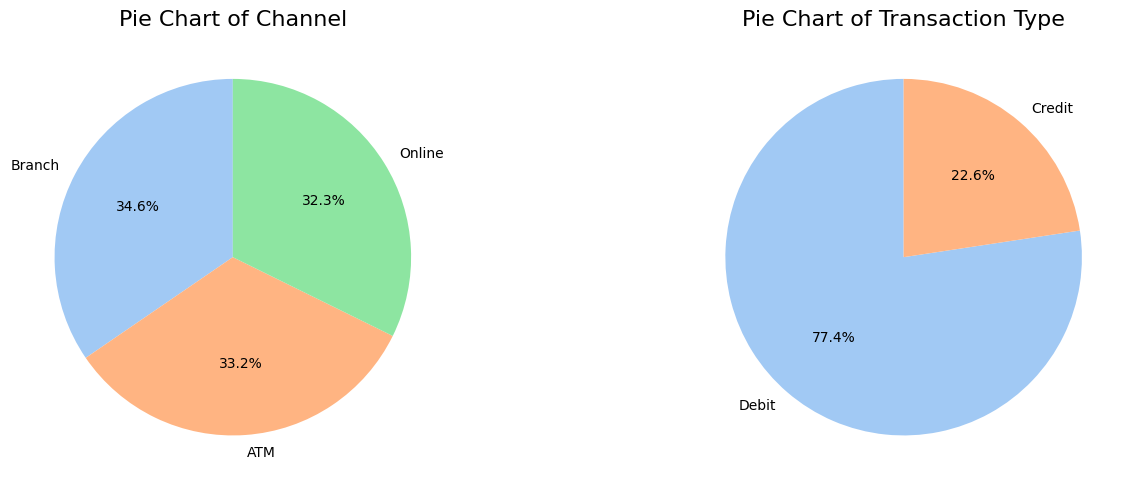

In [718]:
# Plot Pie-Chart for Channel and Transaction type

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Pie chart for 'Channel'
data['Channel'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    ax=axes[0]
)
axes[0].set_title('Pie Chart of Channel', fontsize=16)
axes[0].set_ylabel('')  # Remove y-axis label

# Pie chart for 'TransactionType'
data['TransactionType'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    ax=axes[1]
)
axes[1].set_title('Pie Chart of Transaction Type', fontsize=16)
axes[1].set_ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()


**Conclusion:**

1.   **Transaction** activities are **well distributed across Branch, ATM, and Online channels**, reflecting broad adoption and the continued importance of each service access point in customer banking behavior.
2.   The dataset is **heavily weighted toward debit transaction activity**, indicating that direct account spending is the most frequent action among users, with credit-based activities representing a much smaller fraction.


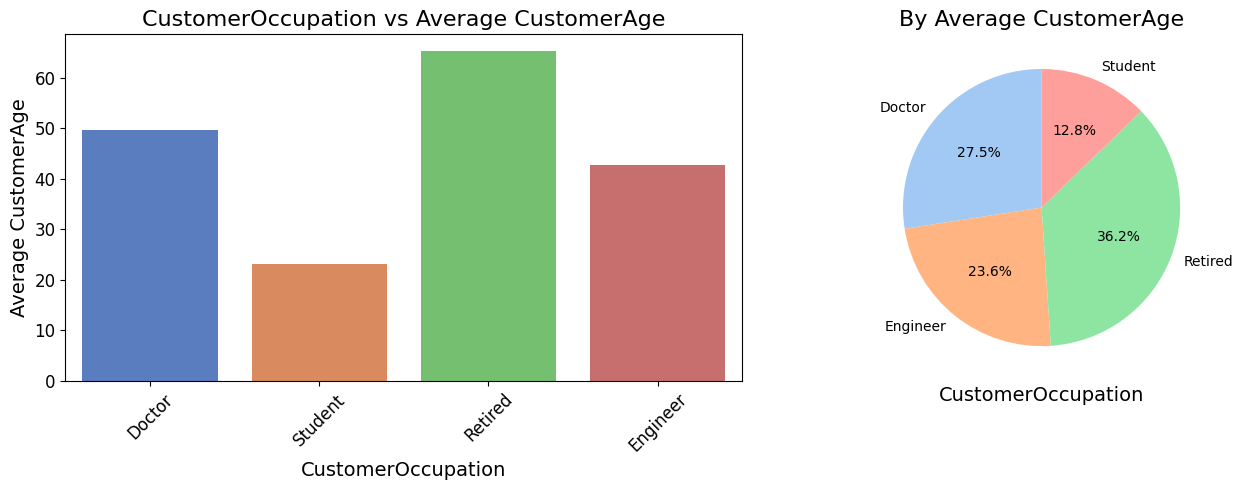

In [719]:
# Plot side-by-side bar graph and pie chart to summarize how CustomerAge varies across different CustomerOccupation categories.
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar graph: Average CustomerAge by CustomerOccupation
sns.barplot(
    x='CustomerOccupation',
    y='CustomerAge',
    data=data,
    estimator='mean',
    palette='muted',
    ci=None,
    ax=axes[0]
)
axes[0].set_title('CustomerOccupation vs Average CustomerAge', fontsize=16)
axes[0].set_xlabel('CustomerOccupation', fontsize=14)
axes[0].set_ylabel('Average CustomerAge', fontsize=14)
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)

# Pie chart: Average CustomerAge distribution by CustomerOccupation
data.groupby('CustomerOccupation')['CustomerAge'].mean().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel'),
    ax=axes[1]
)
axes[1].set_title('By Average CustomerAge', fontsize=16)
axes[1].set_ylabel('')  # Remove default y-axis label
axes[1].set_xlabel('CustomerOccupation', fontsize=14)

plt.tight_layout()
plt.show()


**Key Insights**

1.   **Bar chart** shows the average customer age count of each occupation

  *   **Retired customers** have the **highest average age**—above 65 years—reflecting their life stage.
  *   **Doctor** and **Engineer** groups have **moderate average ages** (around 50 and 42 years, respectively), suggesting established and mid-career professionals.
  *   **Students** are the **youngest** group, with an average age in the mid-20s.

2.   **Pie chart** shows the percentage contribution of each occupation group to the total average customer age:     
  *   **Retired** comprises the **largest segment (36.2%)**, reinforcing their older age structure.
  *   **Doctor** and **Engineer** contribute similar shares **(27.5% and 23.6%)**.
  *   **Student** represents the **smallest share (12.8%)**, owing to their younger age.

**Conclusion:**

There is a **clear, meaningful segmentation in customer age** across occupations. Retired and Doctor groups skew oldest, while Student is youngest, and Engineer is intermediate. These segments enable targeted service and marketing efforts.

In [720]:
# Plot chart to displays the top 20 most frequent Merchant IDs
import plotly.express as px

top_20_merchants = data['MerchantID'].value_counts().head(20).index
top_20_data = data[data['MerchantID'].isin(top_20_merchants)]
top_20_counts = top_20_data['MerchantID'].value_counts().reset_index()
top_20_counts.columns = ['MerchantID', 'Count']

fig = px.bar(
    top_20_counts,
    x='Count',
    y='MerchantID',
    orientation='h',
    color='Count',
    color_continuous_scale='sunsetdark',
    title='Top 20 Most Frequent Merchant IDs',
    labels={'MerchantID': 'Merchant ID', 'Count': 'Count'}
)

fig.update_layout(
    yaxis={'categoryorder':'total ascending'},
    xaxis_title='Count',
    yaxis_title='Merchant ID',
    title_x=0.5,
    title_font=dict(size=16),
    font=dict(size=14),
    height=600,
    width=1300
)

fig.show()


**Key Insights**

**1.   Most Active Merchant**

  *   **Merchant M026** clearly stands out with the **highest count**, significantly exceeding the others with **45 transactions**.

**2.   Transaction Distribution**

  *   **Most** other merchants **range between 30 to 35 transactions**, indicating a relatively balanced transaction frequency among these merchants except for M026.
  *   The **difference** in transaction counts beyond the top merchant suggests there may be** special significance or preferential activity** involving M026.

**3.   Operational Focus**

  *   **Merchants with high transaction frequency** (M066, M028, M014, M065) might be central business partners or popular service providers in the platform's ecosystem.
  *   The **uniformity among merchants from M013 downwards** implies operational consistency across many merchant accounts, possibly due to similar business scales or transaction policies.

**4.   Business Implications**

  *   The standout activity of **M026 may warrant further investigation** to understand what drives its larger transaction volume (e.g., marketing, customer base, special promotions, or geographical reach).
  *   **High-frequency merchants** could be prioritized for customer relationship management, tailored offers, or deeper data analysis as their activity levels have direct impact on business metrics and revenue.


In [721]:
# Convert 'TransactionDate' to datetime format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

# Extract the day of the week
data['DayOfWeek'] = data['TransactionDate'].dt.day_name()

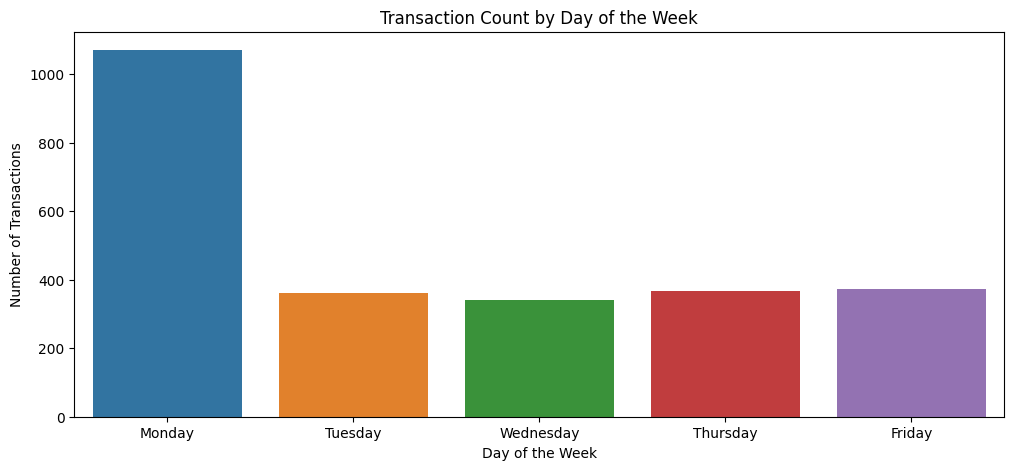

In [722]:
# Plot transaction count by day of the week

plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], palette='tab10')
plt.title('Transaction Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

**Key Insights**

**1.   Strongest Transaction Day**

  *   **Monday** has the **highest volume** by a large margin, with more than 1,000 transactions—about three times higher than any other weekday.

**2.   Weekday Patterns**

  *   Transactions drop sharply **after Monday** and remain **relatively consistent** across Tuesday, Wednesday, Thursday, and Friday, each with 350–380 transactions.
  *   There’s **no significant difference among Tuesday to Friday**, suggesting a relatively stable transaction pattern for the rest of the week.

**Conclusion:**

  Mondays may require more advanced monitoring or manual review capacity, while mid-week days might benefit from more sensitive real-time anomaly detection.

In [723]:
# Extracts the hour of the day

data['Hour'] = data['TransactionDate'].dt.hour

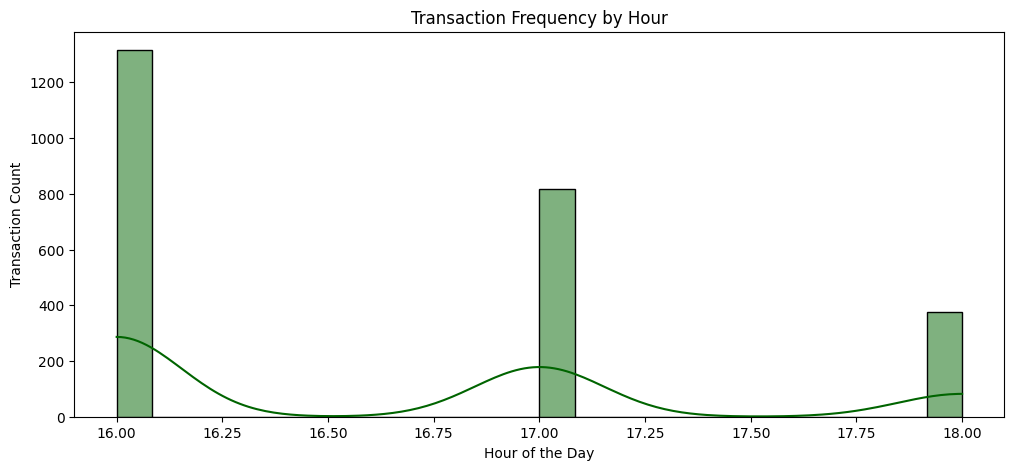

In [724]:
# Plot the distribution of No of Transactions across the hours of the day

plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='Hour', kde=True, bins=24, color='darkgreen')
plt.title("Transaction Frequency by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Transaction Count")
plt.show()

**Key Insights**

**1.   Sharp Transaction Peaks**

  *   There are distinct transaction spikes **at 16:00, 17:00, and 18:00**, with the **highest peak at 16:00** (over **1,200 transactions**), followed by a smaller but significant peak at 17:00, and another at 18:00.
  *   Outside of these specific times, transaction volumes drop to nearly zero, indicating that activity is highly concentrated within these hourly intervals.

**2.   Concentrated Transaction Windows**

  *   Most transactions are clustered **within short periods**, suggesting that business operations, system batches, or user behavior is focused on these hours.
  *   The lack of activity outside these hours could point to fixed processing windows, scheduled payment times, or specific business routines.

**3.   Operational Implications**

  *   System resources and **fraud monitoring efforts** should be concentrated **around these peak hours** to ensure efficient processing and heightened vigilance.
  *   The **unusual concentration** may also merit **further analysis** to understand user or system triggers causing such behavior, or to check for vulnerabilities exposed during peak loads.

## **2. Bivariate Analysis**
### Examines the relationship between two variables, using scatterplots, correlation matrices, or cross-tabulations to identify patterns or associations.

In [725]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

In [726]:
# Compute the correlation matrix for numeric data only
correlation_matrix = numeric_data.corr()

# Verify the correlation matrix
print("\033[1mCorrelation Matrix:\033[0m")
correlation_matrix

Correlation Matrix:


TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000

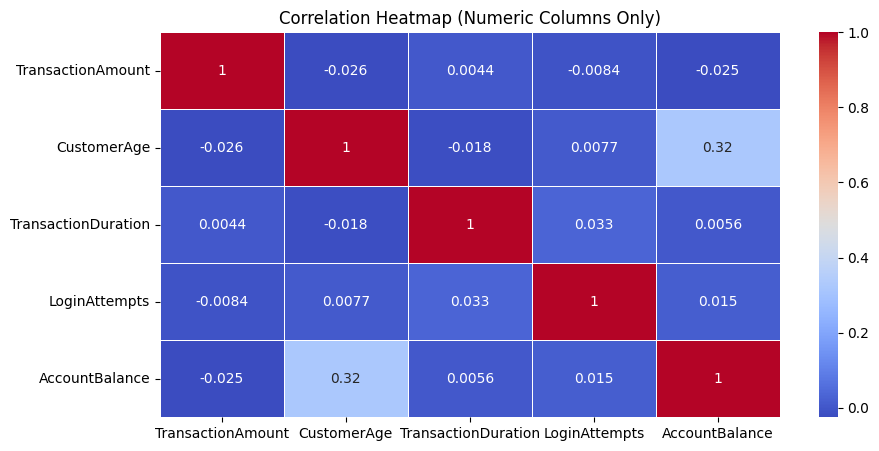

In [727]:
# -------- 1. Correlation Heatmap --------
plt.figure(figsize=(10, 5))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

**Key Insights**

1. **Overall Low Correlation**
Most of the off-diagonal correlation values are **close to 0**, **indicating weak or no linear relationship** between most pairs of variables.

2. **Strongest Correlation**
The strongest positive correlation is between CustomerAge and AccountBalance (0.32), meaning that older customers tend to have slightly higher account balances, though the relationship is still moderate.

3. **Near-Zero or No Correlation**
TransactionAmount shows virtually no correlation with other variables (-0.03, 0.00, -0.01, -0.03).

**TransactionDuration** is almost uncorrelated with all other features.

**LoginAttempts** also appears independent from other variables.

4. **No Strong Negative Correlation**
There are no strong negative correlations in the data—all values are above -0.03.

5. Implications
Since most features are weakly correlated, there is **little redundancy or risk of multicollinearity**, making these variables suitable candidates for simultaneous use in most modeling approaches.

The moderate positive correlation between CustomerAge and AccountBalance could be relevant for demographic profiling or customer segmentation.

**Conclusion:**
The numeric features in the dataset are largely independent, providing unique information for analysis and modeling. The only notable association is a modest link between customer age and account balance, which may warrant deeper business investigation.

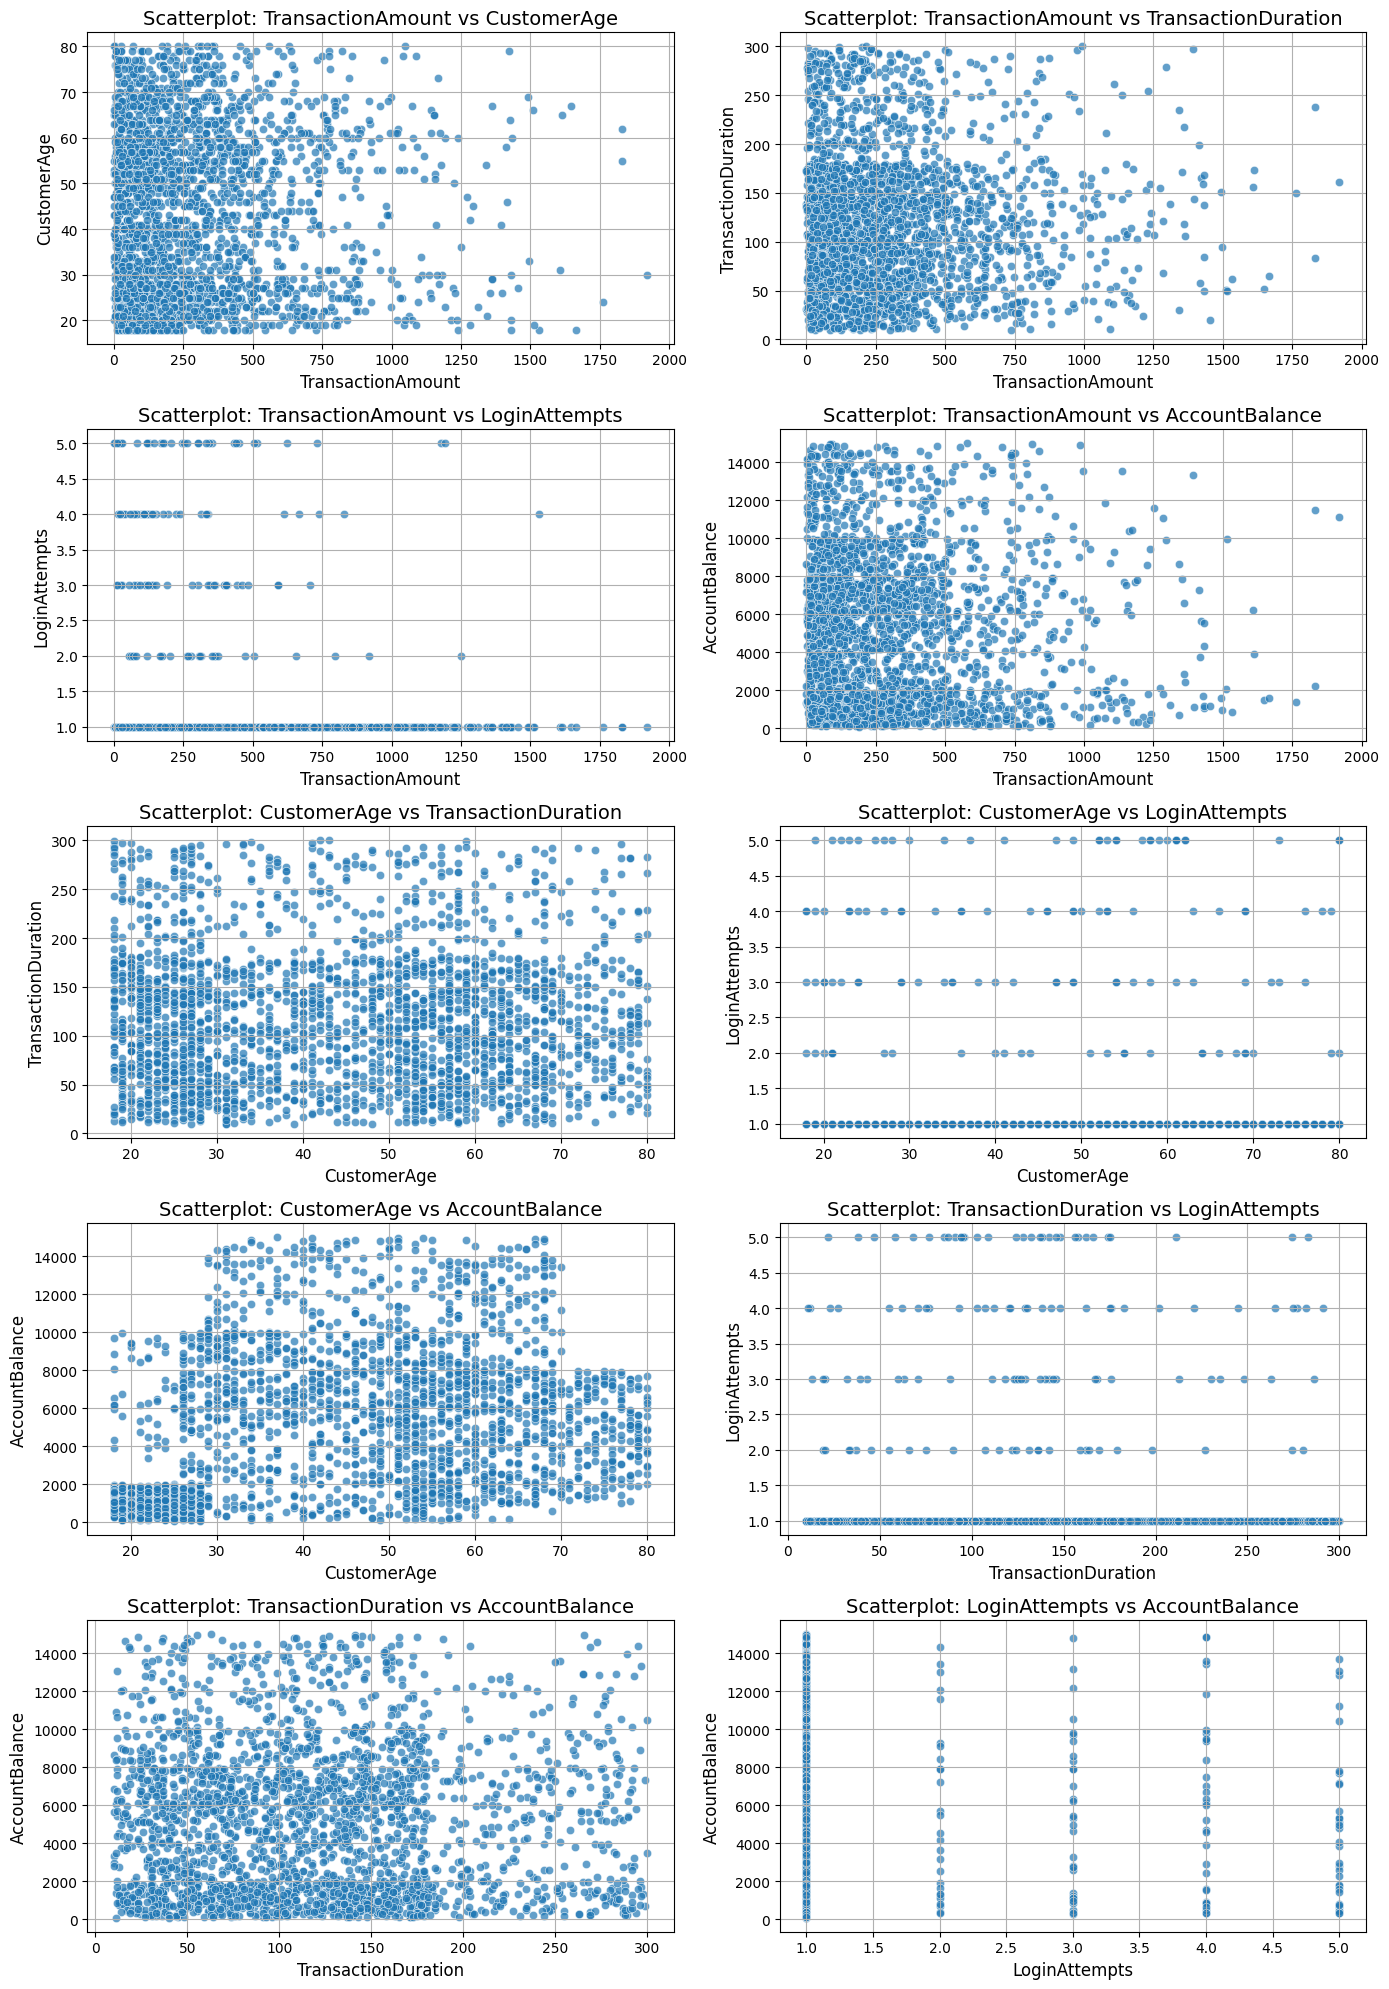

In [728]:
# -------- 2. Scatterplots for Numeric vs Numeric --------
import math

scatter_pairs = [(col1, col2) for i, col1 in enumerate(numeric_cols) for col2 in numeric_cols[i+1:]]
n_scatter = len(scatter_pairs)
cols = 2
rows = math.ceil(n_scatter / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, rows*4))
axes = axes.flatten()

for i, (col1, col2) in enumerate(scatter_pairs):
    sns.scatterplot(x=data[col1], y=data[col2], alpha=0.7, ax=axes[i])
    axes[i].set_title(f'Scatterplot: {col1} vs {col2}', fontsize=14)
    axes[i].set_xlabel(col1, fontsize=12)
    axes[i].set_ylabel(col2, fontsize=12)
    axes[i].grid(True)

# Remove unused axes if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Key Insights**

**1.   Relation Patterns**

  *   **Most numeric variables** show a **weak or no obvious linear relationship**, as the scatter plots appear widely dispersed and lack any major trends or clustering.
  *   Combinations such as TransactionAmount with CustomerAge, TransactionDuration, AccountBalance, and others, display significant spread, suggesting low correlation and complex, non-linear dependencies.

**2.   Categorical Appearance for LoginAttempts**

  *   **LoginAttempts** values are discrete and limited to vertical lines, indicating it is likely a **low-cardinality integer** or categorical feature rather than truly continuous.
  *   This property can help with segmentation but limits correlation with other variables, as can be seen in its scatter plots with TransactionAmount, CustomerAge, TransactionDuration, and AccountBalance.

**3.   AccountBalance Distribution**

  *   AccountBalance exhibits **wide variability across all features** and is not strongly clustered by any single variable, implying that balance is spread across customers regardless of age, transaction amount, or number of login attempts.

**4.   Customer Age and Transactional Features**

  *   There is no clear concentration of higher transaction amounts or durations with specific age groups; **transactions are distributed over a broad span of ages**.

**Summary:**

  *   The **lack of strong visual trends** suggests simple pairwise relationships do not drive the dataset; therefore, advanced analytics or multivariate modeling would be required for deeper insights and reliable predictions on user or transaction behavior.


## Check for OUTLIERS

#### Transaction Amount by Channel and AgeGroup

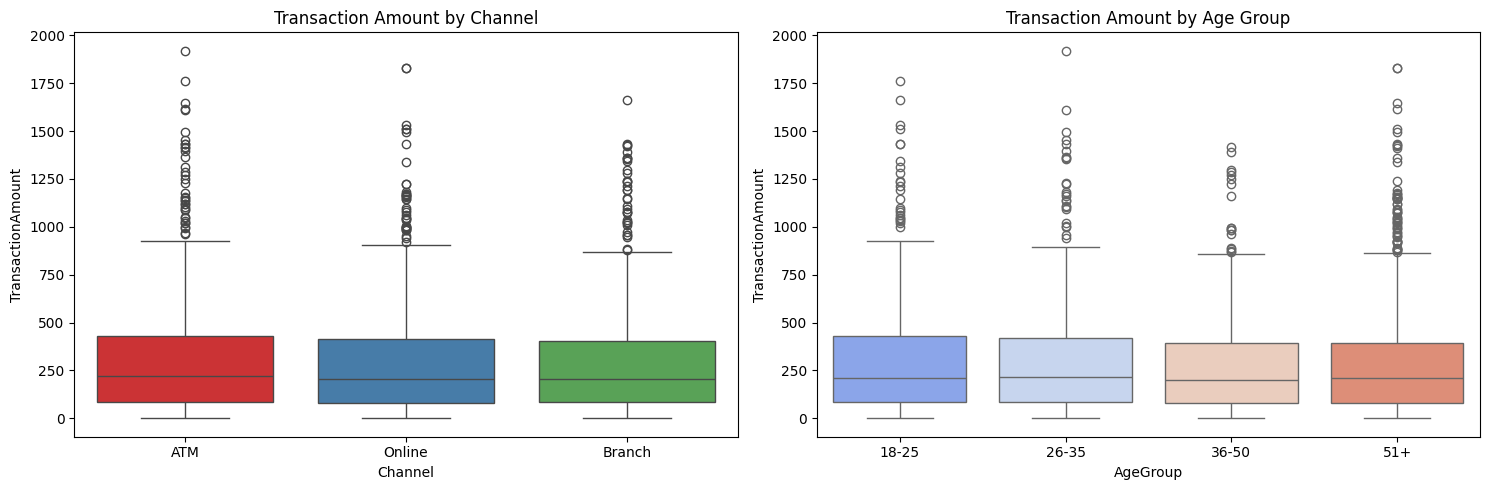

In [729]:
# Boxplots for "Transaction Amount by Channel" and "Transaction Amount by AgeGroup"

data['AgeGroup'] = pd.cut(data['CustomerAge'], bins=[0, 25, 35, 50, 100],
                          labels=['18-25', '26-35', '36-50', '51+'])

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=data, x='Channel', y='TransactionAmount', palette='Set1', ax=axes[0])
axes[0].set_title('Transaction Amount by Channel')

sns.boxplot(data=data, x='AgeGroup', y='TransactionAmount', palette='coolwarm', ax=axes[1])
axes[1].set_title('Transaction Amount by Age Group')

plt.tight_layout()
plt.show()


**Summary**

*   Both **channel** and **age group** do not appear to be major differentiating factors for typical transaction amounts in this dataset.
*   **Extreme transactions (outliers)** are **common across all categories**, indicating some customers across all groups engage in notably large transactions.
*   The **distributions** are **slightly right-skewed**, which is typical for financial data where a small subset of transactions are much higher than average.

#### Transaction Amount by Customer Occupation and LoginAttempts

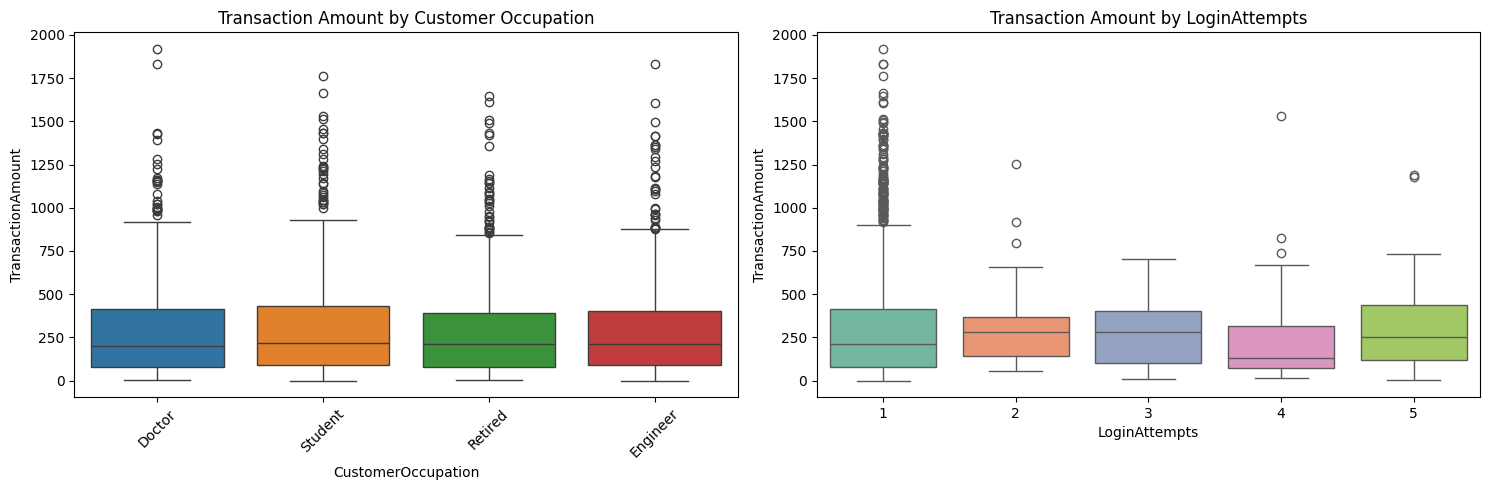

In [730]:
# Boxplots for "Transaction Amount by Customer Occupation" and "Transaction Amount by LoginAttempts"

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.boxplot(data=data, x='CustomerOccupation', y='TransactionAmount', palette='tab10', ax=axes[0])
axes[0].set_title('Transaction Amount by Customer Occupation')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

sns.boxplot(data=data, x='LoginAttempts', y='TransactionAmount', palette='Set2', ax=axes[1])
axes[1].set_title('Transaction Amount by LoginAttempts')

plt.tight_layout()
plt.show()


**Summary**

*   **Occupation** does **not majorly influence transaction amount distribution**; all groups display similar characteristics, although some roles (Doctors, Engineers) may experience a slightly broader range.
*   **Login attempts** impact transaction amounts: fewer attempts correlate with higher and more variable transaction amounts and outliers, while frequent login trouble is associated with lower transaction values.
*   **Outliers—large** transactions—exist across all groups but are **most pronounced in the single login attempt group**, pointing to potential efficiency or trust in the platform by those users.

In [731]:
# Group data by AccountID and count transactions
account_transaction_counts = data.groupby('AccountID').size().reset_index(name='TransactionCount')

# Sort by transaction count in descending order
account_transaction_counts_sorted = account_transaction_counts.sort_values(by='TransactionCount', ascending=False)

# Display the top accounts with the most transactions
print("Top AccountIDs by Transaction Count:")
display(account_transaction_counts_sorted.head())

Top AccountIDs by Transaction Count:


AccountID  TransactionCount
455   AC00460                12
358   AC00363                12
357   AC00362                12
200   AC00202                12
475   AC00480                11

## **3. Multivariate Analysis**
### Explores interactions among three or more variables to uncover complex relationships, often visualized with pairplots or multidimensional clustering methods.

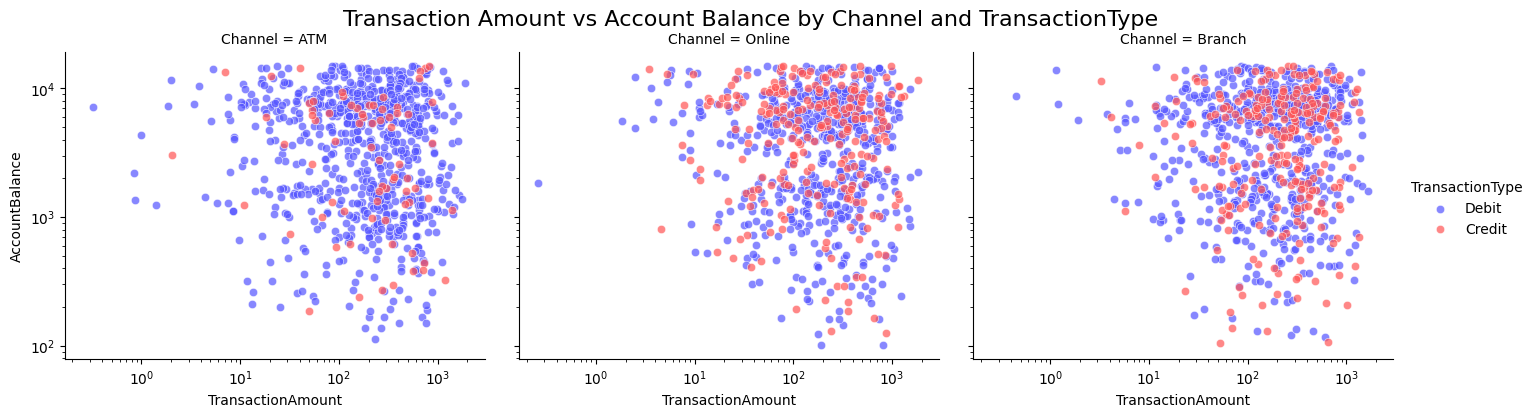

In [732]:
# FacetGrid: Scatterplot of Transaction Amount vs Account Balance by Channel

g = sns.FacetGrid(data, col="Channel", hue="TransactionType", palette="seismic", height=4, aspect=1.2)
g.map(sns.scatterplot, "TransactionAmount", "AccountBalance", alpha=0.7)
g.add_legend()
g.fig.suptitle('Transaction Amount vs Account Balance by Channel and TransactionType', fontsize=16, y=1.02)
plt.xscale('log')
plt.yscale('log')
plt.show()

**Key Insights**

**Log-Distribution of Account Balance and Transaction Amount**

- Both axes are on a **logarithmic scale**, which reveals underlying **spread** and highlights **clusters of small and large transactions** with varying account balances.
- **Transaction amounts** and **account balances** range widely, but most data points cluster from about 1–1,000 units for TransactionAmount and 100–10,000 for AccountBalance, indicating typical transaction and balance sizes.



#### DeviceID and IP Address Variation per Account (Anomaly Detection)

In [733]:
# Calculate the number of unique DeviceIDs used for transactions by each AccountID.
device_variations = data.groupby('AccountID')['DeviceID'].nunique()

# Calculate the number of unique IP Addresses used for transactions by each AccountID.
ip_variations = data.groupby('AccountID')['IP Address'].nunique()

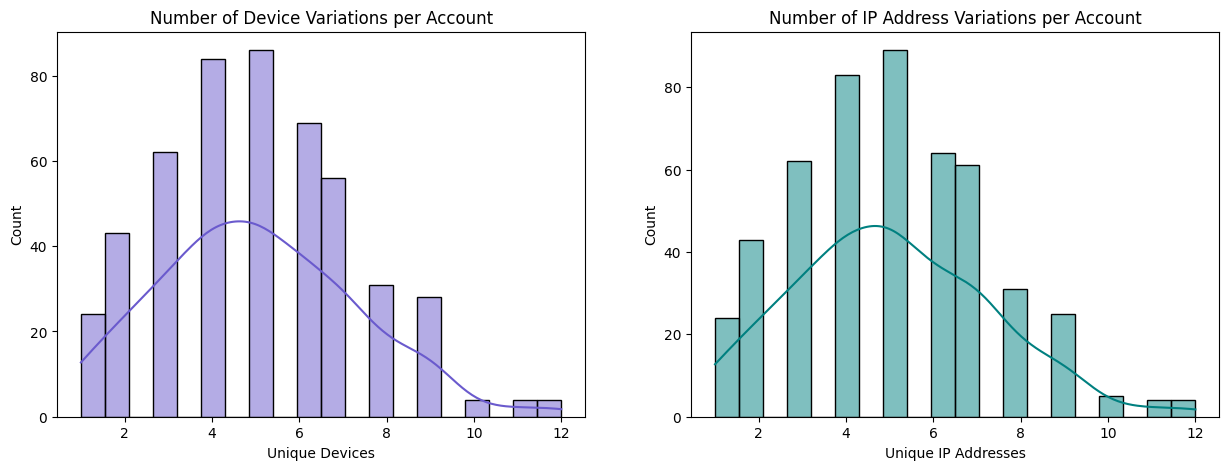

In [734]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(device_variations, bins=20, color='slateblue', kde=True)
plt.title("Number of Device Variations per Account")
plt.xlabel("Unique Devices")
plt.subplot(1, 2, 2)
sns.histplot(ip_variations, bins=20, color='teal', kde=True)
plt.title("Number of IP Address Variations per Account")
plt.xlabel("Unique IP Addresses")
plt.show()

**Key Insights**

**1. Most Accounts Use Limited Devices and IPs**

  *  The **majority of accounts use 4 to 6 unique devices or IP addresses**, as shown by the peak in both distributions.
  *  This pattern is typical for legitimate users accessing accounts from a primary computer, phone, and perhaps a work device or a guest account.

**2. Anomalies Indicate Risk**

  * A **smaller number of accounts use a much larger range (9 or more) of devices or IP addresses**, with outliers showing usage of 10-12 unique variants.
  * High variation in devices or IPs per account can signal potential account sharing, compromise, or fraudulent activity, such as credential stuffing or automation attacks.

**3. Distribution Shape**

  * Both distributions have a **slight right skew**, highlighting that although most accounts are within the lower range, some accounts are clear outliers using an unusually high number of devices or IPs.

**4. Fraud Detection Implications**

  * **Accounts with a very high number of device or IP variations** should be flagged for further review or subjected to additional authentication and risk measures.
  *   Monitoring changes in device/IP variance trends could help detect emerging fraud patterns quickly.


In [735]:
# 3D Scatterplot: Visualize three numeric variables

fig = px.scatter_3d(
    data,
    x='TransactionAmount',
    y='AccountBalance',
    z='TransactionDuration',
    color='CustomerAge',
    title='3D Scatterplot: TransactionAmount vs AccountBalance vs TransactionDuration (Plotly)'
)
fig.update_layout(
    width=1200,   # increase width
    height=700   # increase height
)
fig.show()


---
# **Fraud Detection Methods**
----

### Feature Engineering

In [736]:
# Preprocessing: Handle datetime columns

data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['TimeSinceLastTransaction'] = (data['PreviousTransactionDate'] - data['TransactionDate']).dt.total_seconds() / (60*60*24)

# Convert TimeGap to integer (whole number)
data['TimeSinceLastTransaction'] = data['TimeSinceLastTransaction'].astype(int)

In [737]:
# Separate numerical and categorical columns

numeric_cols = data.select_dtypes(include='number').columns
categorical_cols = data.select_dtypes(include=['object']).columns


In [738]:
# View the columns
numeric_cols, categorical_cols

(Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
        'LoginAttempts', 'AccountBalance', 'Hour', 'TimeSinceLastTransaction'],
       dtype='object'),
 Index(['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID',
        'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation',
        'DayOfWeek'],
       dtype='object'))

### Data Preprocessing

In [739]:
# MinMaxScaler scaler for numeric columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

numeric_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

In [740]:
# Check for Scaled data of Numerical columns
data[numeric_cols].head()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874     0.129032             0.648276            0.0   

   AccountBalance  Hour  TimeSinceLastTransaction  
0        0.336832   0.0                  0.728022  
1        0.918055   0.0                  0.516484  
2        0.068637   1.0                  0.480769  
3        0.569198   0.0                  0.662088  
4        0.492591   0.5                  0.211538

In [741]:
# One-hot encode categorical columns

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')

categorical_encoded = pd.DataFrame(encoder.fit_transform(data[categorical_cols]),
                                   columns=encoder.get_feature_names_out(categorical_cols))

In [742]:
# Combine preprocessed data
processed_data = pd.concat([numeric_scaled, categorical_encoded], axis=1)

In [743]:
# Initialize Fraud column
data['Fraud'] = False

## **1. K-Means Clustering**
### Identifies anomalies based on distance from centroids.

In [744]:
# Selecting 3 Numeric column

numeric_cols = ['TransactionAmount', 'AccountBalance', 'CustomerAge']

In [745]:
data[numeric_cols].head()

TransactionAmount  AccountBalance  CustomerAge
0           0.007207        0.336832     0.838710
1           0.195940        0.918055     0.806452
2           0.065680        0.068637     0.016129
3           0.096016        0.569198     0.129032
4           0.006874        0.492591     0.129032

In [746]:
# Standardize numeric columns for clustering
scaler = MinMaxScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(data[numeric_cols]), columns=numeric_cols)

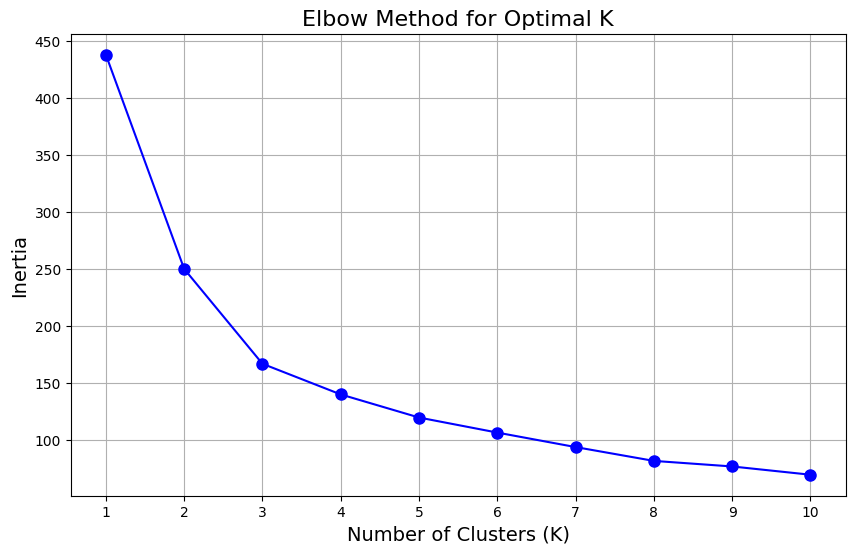

In [747]:
# Plot the Elbow curve to find the cluster

inertia = []
k_range = range(1, 11)  # Test K from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', init = "k-means++", max_iter  = 300)
    kmeans.fit(numeric_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-', markersize=8)
#plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters (K)', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.xticks(k_range)
plt.grid(True)
plt.show()



In [748]:
# Find Silhoutee score
from sklearn import metrics
from sklearn.metrics import silhouette_score

kmeans_values=[]

for cluster in range(2,12):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(numeric_scaled)
    sil_score = metrics.silhouette_score(numeric_scaled, kmeans, metric='euclidean')
    print("For n_clusters = {}, the silhouette score is {})".format(cluster, sil_score))
    kmeans_values.append((cluster,sil_score))

For n_clusters = 2, the silhouette score is 0.393410677653147)
For n_clusters = 3, the silhouette score is 0.40666068371370656)
For n_clusters = 4, the silhouette score is 0.38416398079174946)
For n_clusters = 5, the silhouette score is 0.39095118748373264)
For n_clusters = 6, the silhouette score is 0.3690835973087543)
For n_clusters = 7, the silhouette score is 0.3693895973491111)
For n_clusters = 8, the silhouette score is 0.34617676743205195)
For n_clusters = 9, the silhouette score is 0.3603567439723995)
For n_clusters = 10, the silhouette score is 0.36359114606587156)
For n_clusters = 11, the silhouette score is 0.3436955727102068)


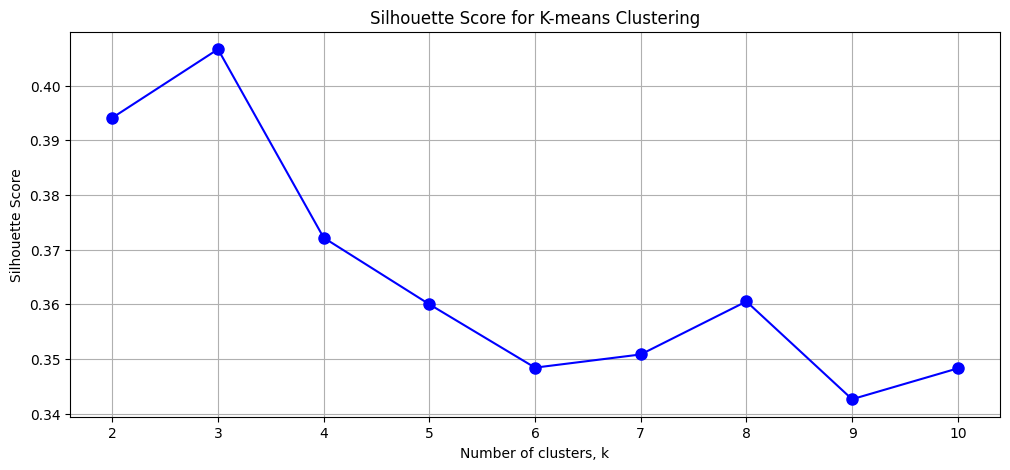

Best number of clusters by silhouette score: 3


In [854]:
# plot the Silhouette score

silhouette_scores = []
K = range(2, 11)  # Silhouette score is undefined for k=1

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(numeric_scaled)
    score = silhouette_score(numeric_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot Silhouette scores
plt.figure(figsize=(12, 5))
plt.plot(K, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for K-means Clustering')
plt.xticks(K)
plt.grid(True)
plt.show()

# Print best k based on silhouette score
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters by silhouette score: {best_k}")


In [750]:
# Perform K-Means clustering

kmeans = KMeans(n_init='auto', )  # FutureProofing
kmeans.fit(numeric_scaled)
n_clusters = 3  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(numeric_scaled)
data['KMeans_Cluster'] = kmeans_labels

# Create a mapping from cluster number to a descriptive name
cluster_names = {
    0: 'Cluster 0',
    1: 'Cluster 1',
    2: 'Cluster 2',
    3: 'Cluster 3'
}

# Add a new column with descriptive cluster names
data['KMeans_Cluster_Name'] = data['KMeans_Cluster'].map(cluster_names)

In [751]:
# Calculate distances from centroids
centroids = kmeans.cluster_centers_
distances = np.linalg.norm(numeric_scaled.values - centroids[kmeans_labels], axis=1)
data['KMeans_Distance'] = distances

In [752]:
# Set threshold: Mean + 3 * Standard Deviation
threshold = distances.mean() + 3 * distances.std()
data['KMeans_Fraud'] = distances > threshold

In [753]:
# Summary of flagged anomalies
fraud_summary = data['KMeans_Fraud'].value_counts()
threshold, fraud_summary, data[['TransactionAmount', 'KMeans_Distance', 'KMeans_Fraud']].head()

(np.float64(0.5594024669498763),
 KMeans_Fraud
 False    2483
 True       29
 Name: count, dtype: int64,
    TransactionAmount  KMeans_Distance  KMeans_Fraud
 0           0.007207         0.199338         False
 1           0.195940         0.464530         False
 2           0.065680         0.153001         False
 3           0.096016         0.313906         False
 4           0.006874         0.367881         False)

In [754]:
# Calculate centroids and scale them back to the original feature space
centroids_scaled = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)

In [755]:
# Add a fraud detection logic (using distance from centroids)
distances = np.linalg.norm(numeric_scaled - centroids_scaled[kmeans_labels], axis=1)
threshold = distances.mean() + 3 * distances.std()
data['Fraud'] = distances > threshold
data['KMeans_Distance'] = distances

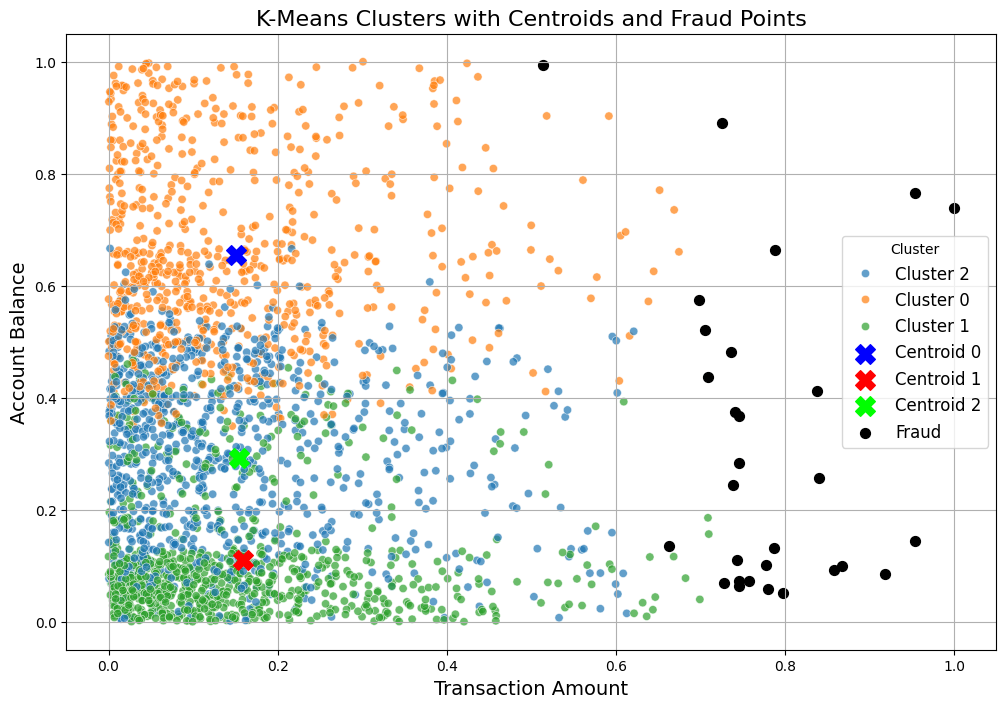

In [756]:
# Scatterplot for two features with clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['KMeans_Cluster_Name'],  # Use the cluster names for coloring and legend
    palette='tab10',
    alpha=0.7,
    legend='full',
)

# Overlay centroids on the scatterplot
colors = plt.cm.get_cmap('brg', len(centroids_original)) # Get a colormap
for i, centroid in enumerate(centroids_original):
    plt.scatter(
        centroid[numeric_cols.index('TransactionAmount')],
        centroid[numeric_cols.index('AccountBalance')],
        color=colors(i), # Use a different color for each centroid
        marker='X',
        s=200,
        label=f'Centroid {i}'
    )

# Highlight fraud points
fraud_points = data[data['Fraud']]
plt.scatter(
    fraud_points['TransactionAmount'],
    fraud_points['AccountBalance'],
    color='black',
    marker='o',
    s=50,
    label='Fraud'
)

plt.title('K-Means Clusters with Centroids and Fraud Points', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)
plt.legend(title='Cluster', fontsize=12) # Update legend title


plt.grid(True)
plt.show()

**Summary:**

- The **K-Means clustering** visualization segments transactions into clusters based  on Transaction Amount and Account Balance, with **centroids** marking typical behavior.
- **Fraudulent transactions**, shown in black, are flagged when they lie far from their cluster centroids, indicating abnormal spending relative to account balance.
- These **outliers** often represent unusually high-value withdrawals or deposits inconsistent with typical account activity.
- This method highlights accounts exhibiting spending patterns outside their peer group, signaling potential laundering or rapid cash-out behavior worth further monitoring.

In [757]:
# Print summary of fraud points
kmeans_fraud_points = data['Fraud'].sum()
print(f"Total Fraudulent Transactions Detected (Using K Means clustering): {kmeans_fraud_points}")
#print(f"Fraudulent transactions saved to: {fraud_output_path}")

Total Fraudulent Transactions Detected (Using K Means clustering): 29


In [758]:
# Display fraud transactions
print("Fraudulent Transactions Detected: ")
#print(fraud_points)
#display(fraud_points)
fraud_points.head()

Fraudulent Transactions Detected: 


TransactionID AccountID  TransactionAmount     TransactionDate  \
85       TX000086   AC00098           0.698298 2023-09-29 17:22:10   
190      TX000191   AC00396           0.741220 2023-07-10 17:49:18   
340      TX000341   AC00107           0.953561 2023-03-01 16:31:58   
344      TX000345   AC00156           0.662709 2023-08-28 16:43:15   
375      TX000376   AC00316           0.725580 2023-11-20 16:51:14   

    TransactionType     Location DeviceID      IP Address MerchantID Channel  \
85           Credit       Austin  D000574  165.114.224.47       M012  Online   
190           Debit   Washington  D000569  188.124.181.12       M072  Branch   
340           Debit  San Antonio  D000436   62.27.235.199       M082  Online   
344           Debit      Houston  D000312  210.136.14.108       M073     ATM   
375           Debit      El Paso  D000113   63.67.150.226       M013  Branch   

     ...  PreviousTransactionDate  DayOfWeek  Hour  AgeGroup  \
85   ...      2024-11-04 08:06:53     Friday   0.5       51+   
190  ...      2024-11-04 08:06:50     Monday   0.5       51+   
340  ...      2024-11-04 08:11:59  Wednesday   0.0       51+   
344  ...      2024-11-04 08:09:27     Monday   0.0     36-50   
375  ...      2024-11-04 08:09:15     Monday   0.0     36-50   

     TimeSinceLastTransaction Fraud KMeans_Cluster  KMeans_Cluster_Name  \
85                   0.258242  True              0            Cluster 0   
190                  0.480769  True              2            Cluster 2   
340                  0.840659  True              2            Cluster 2   
344                  0.346154  True              2            Cluster 2   
375                  0.115385  True              0            Cluster 0   

    KMeans_Distance  KMeans_Fraud  
85         0.574836          True  
190        0.651722          True  
340        0.820900          True  
344        0.585202          True  
375        0.623446          True  

[5 rows x 25 columns]

## **2. DBSCAN Analysis**
### Detects density-based anomalies as noise points.

In [759]:
from sklearn.cluster import DBSCAN

In [760]:
# Define features for DBSCAN clustering
features = ['TransactionAmount', 'TransactionDuration', 'CustomerAge', 'AccountBalance']
X = data[features]

In [761]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

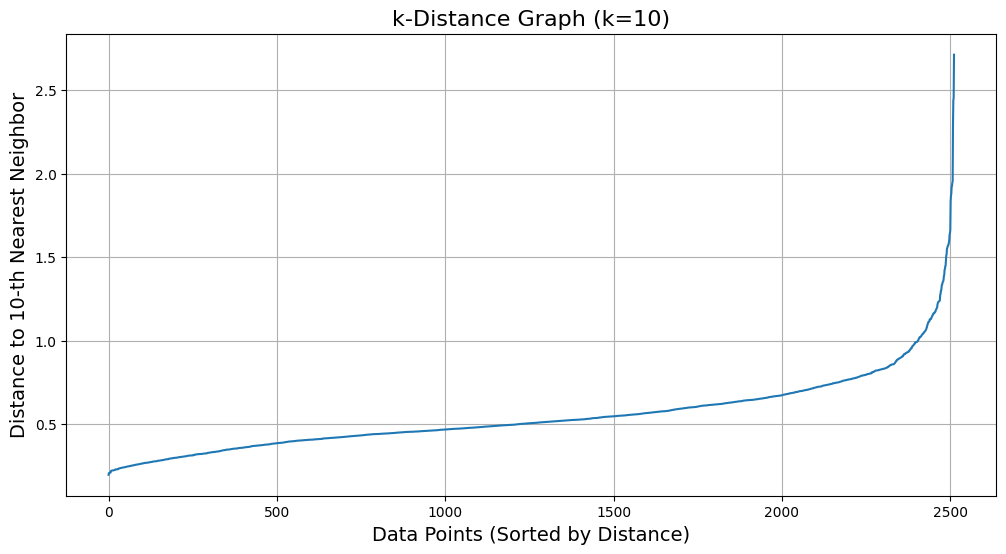

Observe the plot and look for the 'knee' or elbow point. This point is often a good estimate for the optimal 'eps' value.


In [762]:
from sklearn.neighbors import NearestNeighbors

# Determine k for k-distance (typically min_samples)
min_samples = 10  # Using the min_samples value from the previous DBSCAN attempt

# Calculate the distance to the k-th nearest neighbor for each point
neigh = NearestNeighbors(n_neighbors=min_samples)
neigh.fit(X_scaled)  # Use the scaled data
distances, indices = neigh.kneighbors(X_scaled)

# Sort the distances
distances = np.sort(distances[:, min_samples - 1], axis=0)

# Plot the k-distance graph
plt.figure(figsize=(12, 6))
plt.plot(distances, linestyle='-')
plt.title(f'k-Distance Graph (k={min_samples})', fontsize=16)
plt.xlabel('Data Points (Sorted by Distance)', fontsize=14)
plt.ylabel(f'Distance to {min_samples}-th Nearest Neighbor', fontsize=14)
plt.grid(True)
plt.show()

print("Observe the plot and look for the 'knee' or elbow point. This point is often a good estimate for the optimal 'eps' value.")

In [763]:
# Apply DBSCAN
dbscan = DBSCAN(eps= 1, min_samples= 3)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_scaled)
data['DBSCAN_Cluster'] = dbscan_labels

In [764]:
# Flag fraud points (noise points are labeled -1)
data['DBSCAN_Fraud'] = data['DBSCAN_Cluster'] == -1

In [765]:
# Extract fraudulent transactions
dbscan_fraud_points = data[data['DBSCAN_Fraud']]

In [766]:
# Summary of results
total_dbscan_fraud_points = data['DBSCAN_Fraud'].sum()
dbscan_fraud_points_summary = dbscan_fraud_points[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'DBSCAN_Fraud']]


In [767]:
# Mark noise points in Fraud column
data['Fraud'] |= data['DBSCAN_Fraud']

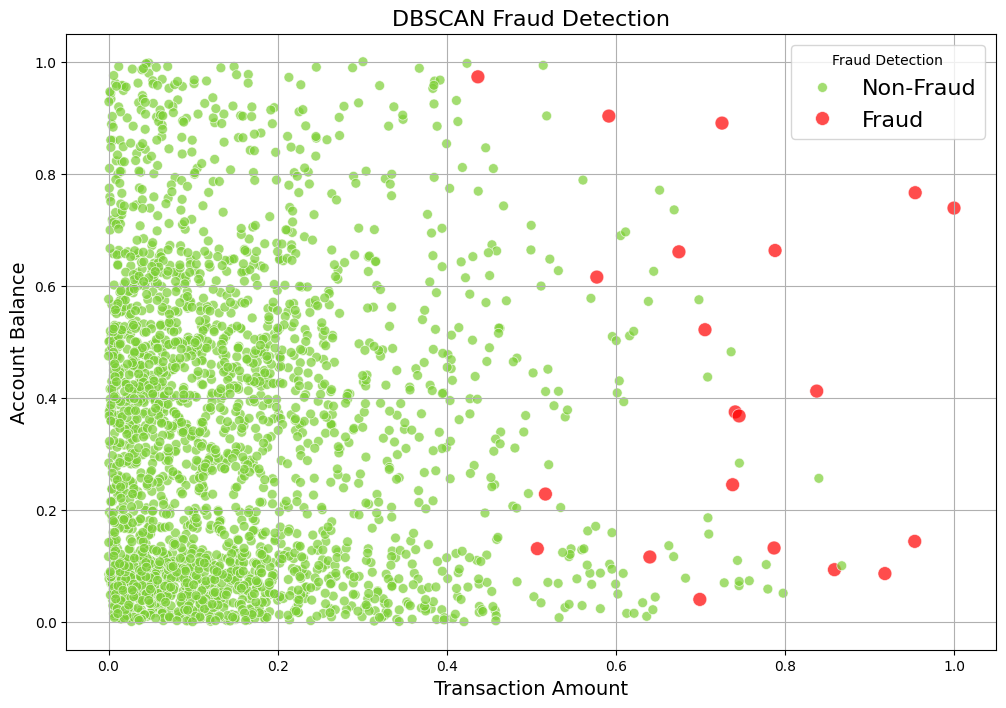

In [768]:
# Scatterplot for DBSCAN fraud detection
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['DBSCAN_Fraud'],
    palette={True: 'red', False: '#7CCF35'},
    size=data['DBSCAN_Fraud'],  # Use DBSCAN_Fraud for size mapping
    sizes={True: 100, False: 50}, # Define sizes for True and False
    alpha=0.7
)
plt.title('DBSCAN Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)

# Get the legend handles from the plot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Non-Fraud', 'Fraud'], title='Fraud Detection', fontsize=16)

plt.grid(True)
plt.show()

**Summary:**
- The **DBSCAN** clustering method **identifies density-based anomalies**, labeling sparse outliers as fraudulent. In this scatterplot, most transactions cluster in dense grey regions, indicating normal account behavior.
- **Fraudulent cases**, highlighted in **red**, fall outside these dense pockets, often where transaction amounts are unusually high relative to account balances.
- Unlike K-Means, DBSCAN is **effective at detecting irregular patterns** in accounts with both small balances and unexpected spikes in spending.
- This approach **uncovers fraud cases that blend into normal ranges but occur in isolated**, low-density zones—strong indicators of anomalous financial behavior.

In [769]:
# Summary
print(f"Total Fraudulent Transactions Detected by DBSCAN: {total_dbscan_fraud_points}")
#print(f"Fraudulent transactions saved to: {dbscan_fraud_output_path}")
#print(dbscan_fraud_points)
dbscan_fraud_points.head()

Total Fraudulent Transactions Detected by DBSCAN: 21


TransactionID AccountID  TransactionAmount     TransactionDate  \
146      TX000147   AC00385           0.507142 2023-08-30 17:23:20   
190      TX000191   AC00396           0.741220 2023-07-10 17:49:18   
340      TX000341   AC00107           0.953561 2023-03-01 16:31:58   
375      TX000376   AC00316           0.725580 2023-11-20 16:51:14   
486      TX000487   AC00148           0.738166 2023-01-16 17:00:11   

    TransactionType     Location DeviceID      IP Address MerchantID Channel  \
146           Debit   Sacramento  D000292  202.194.199.70       M026  Branch   
190           Debit   Washington  D000569  188.124.181.12       M072  Branch   
340           Debit  San Antonio  D000436   62.27.235.199       M082  Online   
375           Debit      El Paso  D000113   63.67.150.226       M013  Branch   
486           Debit    Nashville  D000418  219.98.242.240       M015     ATM   

     ...  Hour AgeGroup  TimeSinceLastTransaction  Fraud  KMeans_Cluster  \
146  ...   0.5      51+                  0.340659  False               2   
190  ...   0.5      51+                  0.480769   True               2   
340  ...   0.0      51+                  0.840659   True               2   
375  ...   0.0    36-50                  0.115385   True               0   
486  ...   0.5    36-50                  0.961538   True               2   

    KMeans_Cluster_Name KMeans_Distance  KMeans_Fraud DBSCAN_Cluster  \
146           Cluster 2        0.456135         False             -1   
190           Cluster 2        0.651722          True             -1   
340           Cluster 2        0.820900          True             -1   
375           Cluster 0        0.623446          True             -1   
486           Cluster 2        0.640803          True             -1   

     DBSCAN_Fraud  
146          True  
190          True  
340          True  
375          True  
486          True  

[5 rows x 27 columns]

## **3. Isolation Forest**
### Highlights anomalous transactions using tree-based partitioning.

In [770]:
from sklearn.ensemble import IsolationForest
warnings.filterwarnings("ignore", category=FutureWarning)

In [771]:
numeric_scaled

TransactionAmount  AccountBalance  CustomerAge
0              0.007207        0.336832     0.838710
1              0.195940        0.918055     0.806452
2              0.065680        0.068637     0.016129
3              0.096016        0.569198     0.129032
4              0.006874        0.492591     0.129032
...                 ...             ...          ...
2507           0.446074        0.846257     0.241935
2508           0.130953        0.010318     0.483871
2509           0.014785        0.220590     0.612903
2510           0.096782        0.112636     0.080645
2511           0.126545        0.002017     0.096774

[2512 rows x 3 columns]

In [772]:
# Apply Isolation Forest

iso_forest = IsolationForest(contamination=0.02, random_state=42 )  # 2% expected anomalies
iso_forest.fit(numeric_scaled)  # Fit on the scaled numeric data


IsolationForest(contamination=0.02, random_state=42)

In [773]:
# Predict anomalies
data['IsoForest_Score'] = iso_forest.decision_function(numeric_scaled)
data['IsoForest_Fraud'] = iso_forest.predict(numeric_scaled) == -1  # Mark anomalies (-1) as fraud

In [774]:
# Extract fraudulent transactions
iso_fraud_points = data[data['IsoForest_Fraud']]

In [775]:
# Summary of Isolation Forest results
total_iso_fraud_points = data['IsoForest_Fraud'].sum()
iso_fraud_points_summary = iso_fraud_points[['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'IsoForest_Fraud']]

In [776]:
# Adding True values to Fraud column
data['Fraud'] |= data['IsoForest_Fraud']

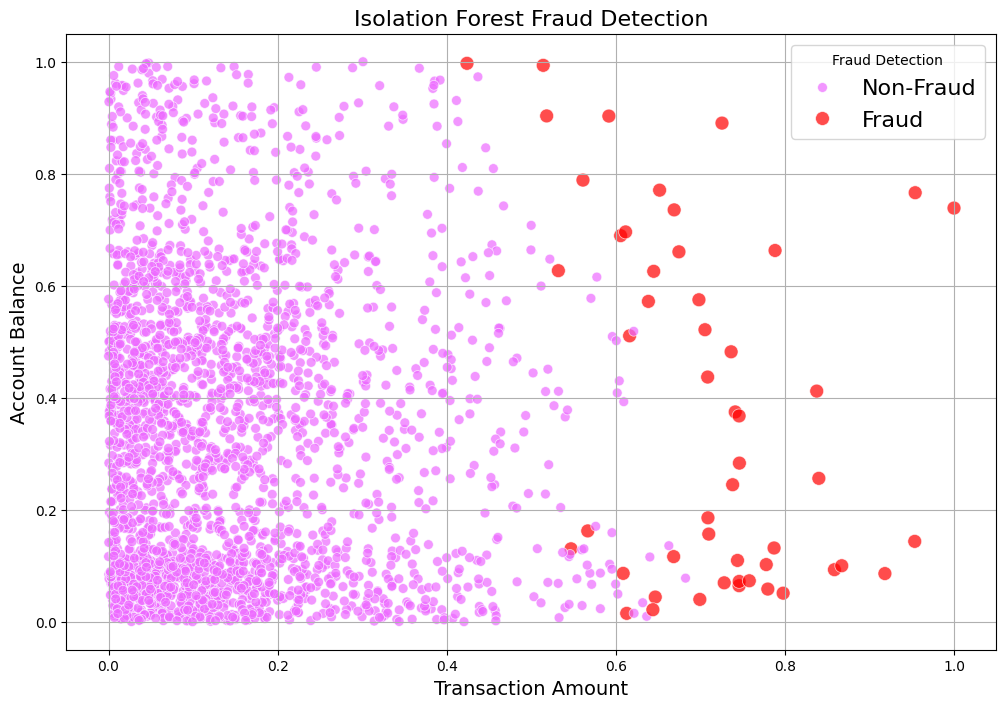

In [777]:
# Scatterplot to visualize fraud points
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['IsoForest_Fraud'],
    palette={True: 'red', False: '#ED6AFF'},
    size=data['IsoForest_Fraud'],
    sizes={True: 100, False: 50},
    alpha=0.7
)
plt.title('Isolation Forest Fraud Detection', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Account Balance', fontsize=14)

# Get the legend handles from the plot
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['Non-Fraud', 'Fraud'], title='Fraud Detection', fontsize=16)

plt.grid(True)
plt.show()

# Outputs
#total_iso_fraud_points, iso_fraud_points_summary.head(), iso_fraud_points_summary.shape

**Summary:**
- The **Isolation Forest** model **isolates outliers by recursively partitioning transaction data**, making anomalies easier to separate.
- In this scatterplot, normal transactions (lavender) cluster together, while **fraudulent ones (red)** appear scattered, particularly at high transaction amounts with unusually low or mismatched account balances.
- Unlike clustering methods, Isolation Forest is **robust in detecting subtle anomalies even within dense clusters**.
- It successfully **flags hidden fraudulent cases** where amounts and balances seem plausible but deviate statistically from typical transaction distributions, making it highly effective for proactive fraud surveillance.

In [778]:
# Confirm the save location and number of frauds
print(f"Total Fraudulent Transactions Detected (using isolation forest): {total_iso_fraud_points}")
#print(f"Fraudulent transactions saved to: {fraud_output_path}")
iso_fraud_points.head()

Total Fraudulent Transactions Detected (using isolation forest): 51


TransactionID AccountID  TransactionAmount     TransactionDate  \
85       TX000086   AC00098           0.698298 2023-09-29 17:22:10   
141      TX000142   AC00114           0.547026 2023-10-23 16:50:33   
176      TX000177   AC00363           0.709951 2023-02-10 18:07:07   
190      TX000191   AC00396           0.741220 2023-07-10 17:49:18   
274      TX000275   AC00454           0.612878 2023-12-20 16:08:02   

    TransactionType     Location DeviceID      IP Address MerchantID Channel  \
85           Credit       Austin  D000574  165.114.224.47       M012  Online   
141           Debit      Detroit  D000522   121.67.144.20       M052     ATM   
176           Debit      El Paso  D000213    93.52.44.101       M001     ATM   
190           Debit   Washington  D000569  188.124.181.12       M072  Branch   
274          Credit  Kansas City  D000476     50.202.8.53       M074     ATM   

     ...  TimeSinceLastTransaction  Fraud  KMeans_Cluster  \
85   ...                  0.258242   True               0   
141  ...                  0.192308  False               2   
176  ...                  0.892857  False               1   
190  ...                  0.480769   True               2   
274  ...                  0.032967  False               2   

     KMeans_Cluster_Name  KMeans_Distance KMeans_Fraud DBSCAN_Cluster  \
85             Cluster 0         0.574836         True              0   
141            Cluster 2         0.513225        False              0   
176            Cluster 1         0.554902        False              0   
190            Cluster 2         0.651722         True             -1   
274            Cluster 2         0.551761        False              0   

     DBSCAN_Fraud IsoForest_Score  IsoForest_Fraud  
85          False       -0.023963             True  
141         False       -0.009067             True  
176         False       -0.014139             True  
190          True       -0.056650             True  
274         False       -0.000151             True  

[5 rows x 29 columns]

# Fraud Detection Comparison Across Algorithms

In this section, we **compare the performance of three fraud detection methods**—**K-Means, DBSCAN, and Isolation Forest**—by evaluating the number of transactions each algorithm flags as fraudulent. We calculate fraud counts for each method, determine the overlap among them, and visualize the results using a bar chart styled.

In [779]:
print("Fraud Detection Counts:")
print(f"K-Means: {kmeans_fraud_points}")
print(f"DBSCAN: {total_dbscan_fraud_points}")
print(f"Isolation Forest: {total_iso_fraud_points}")

Fraud Detection Counts:
K-Means: 29
DBSCAN: 21
Isolation Forest: 51


In [780]:
# Example fraud transaction IDs as sets (replace with actual fraud transaction identifiers)
kmeans_frauds = set(range(1, kmeans_fraud_points + 1))
dbscan_frauds = set(range(10, 10 + total_dbscan_fraud_points))
iso_frauds = set(range(20, 20 + total_iso_fraud_points))

In [781]:
# Calculate subset sizes
only_kmeans = len(kmeans_frauds - dbscan_frauds - iso_frauds)
only_dbscan = len(dbscan_frauds - kmeans_frauds - iso_frauds)
only_iso = len(iso_frauds - kmeans_frauds - dbscan_frauds)
kmeans_dbscan = len(kmeans_frauds.intersection(dbscan_frauds) - iso_frauds)
kmeans_iso = len(kmeans_frauds.intersection(iso_frauds) - dbscan_frauds)
dbscan_iso = len(dbscan_frauds.intersection(iso_frauds) - kmeans_frauds)

In [782]:
# Compute common fraud transactions between methods
common_km_db = kmeans_frauds.intersection(dbscan_frauds)
common_km_iso = kmeans_frauds.intersection(iso_frauds)
common_db_iso = dbscan_frauds.intersection(iso_frauds)
common_all = kmeans_frauds.intersection(dbscan_frauds).intersection(iso_frauds)

In [783]:
# Print fraud counts
print("Fraud Detection Counts:")
print(f"K-Means: {kmeans_fraud_points}")
print(f"DBSCAN: {total_dbscan_fraud_points}")
print(f"Isolation Forest: {total_iso_fraud_points}")

Fraud Detection Counts:
K-Means: 29
DBSCAN: 21
Isolation Forest: 51


In [784]:
# Print common frauds between methods
print(f"Common frauds K-Means & DBSCAN: {len(common_km_db)}")
print(f"Common frauds K-Means & Isolation Forest: {len(common_km_iso)}")
print(f"Common frauds DBSCAN & Isolation Forest: {len(common_db_iso)}")
print(f"Common frauds all three: {len(common_all)}")

Common frauds K-Means & DBSCAN: 20
Common frauds K-Means & Isolation Forest: 10
Common frauds DBSCAN & Isolation Forest: 11
Common frauds all three: 10


In [785]:
# Plotting fraud counts by method
methods = ['K-Means', 'DBSCAN', 'Isolation Forest']
fraud_counts = [kmeans_fraud_points, total_dbscan_fraud_points, total_iso_fraud_points]

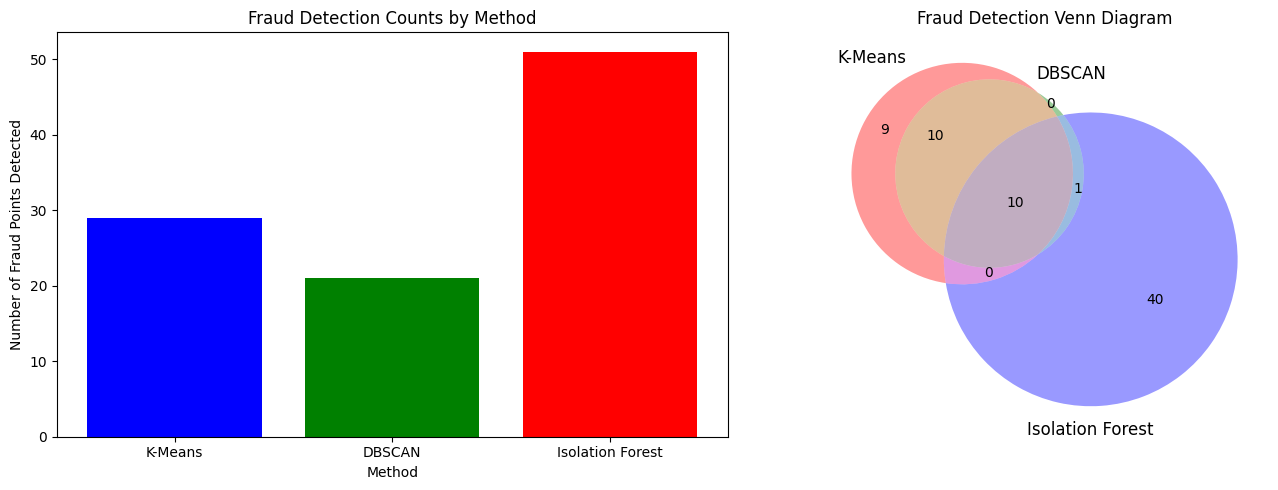

In [786]:
fig = plt.figure(figsize=(14, 5))

# Bar chart subplot
ax1 = fig.add_subplot(1, 2, 1)
ax1.bar(methods, fraud_counts, color=['blue', 'green', 'red'])
ax1.set_title('Fraud Detection Counts by Method')
ax1.set_xlabel('Method')
ax1.set_ylabel('Number of Fraud Points Detected')


# Venn diagram subplot
ax2 = fig.add_subplot(1, 2, 2)
venn3(subsets=(only_kmeans, only_dbscan, kmeans_dbscan, only_iso, kmeans_iso, dbscan_iso, len(common_all)),
      set_labels=('K-Means', 'DBSCAN', 'Isolation Forest'), ax=ax2)
ax2.set_title('Fraud Detection Venn Diagram')

plt.tight_layout()
plt.show()

**Key Insights**

- **Isolation Forest** is the **most aggressive in flagging anomalies**, but the highest-confidence frauds are those detected by all three.

- **K-Means** and **DBSCAN** offer complementary, but generally more conservative, detection.

- Consensus among models strengthens fraud identification, while unique detections may warrant further investigation.

## Fraud Detection using Random Forest and DBSCAN
- Now we have a target variable which has the value marked as True or False for transactions which are considered as Fraud or Non-Fraud.

In [787]:
print("DBSCAN Fraud Summary:")
print(data['DBSCAN_Fraud'].value_counts())

DBSCAN Fraud Summary:
DBSCAN_Fraud
False    2491
True       21
Name: count, dtype: int64


In [788]:
# Dropping all Irrelevant columns and keeping only DBSCAN

columns_to_include = ['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate',
       'DayOfWeek', 'Hour', 'AgeGroup', 'TimeSinceLastTransaction', 'DBSCAN_Fraud']
data = data[columns_to_include]

In [789]:
# Check the percentage distribution of Target variable

data['DBSCAN_Fraud'].value_counts(normalize=True)*100

DBSCAN_Fraud
False    99.164013
True      0.835987
Name: proportion, dtype: float64

**Target Column** is highly **Imbalanced** as one class consist of 99.16%  while the other class consist of 0.836% data

In [790]:
# Separate all the Numerical columns in separate variable

numerical_columns = data.select_dtypes(include=np.number).columns
numerical_columns

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'Hour', 'TimeSinceLastTransaction'],
      dtype='object')

In [791]:
# Separate all the categorical columns in separate variable

categorical_columns = data.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType',
       'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel',
       'CustomerOccupation', 'PreviousTransactionDate', 'DayOfWeek',
       'AgeGroup', 'DBSCAN_Fraud'],
      dtype='object')

In [792]:
# Creating copy of dataset and dropping transaction id

# Create a copy of the original dataset
dataNew = data.copy()

# Drop the 'TransactionID' column from the new dataset
dataNew = dataNew.drop('TransactionID', axis=1)

#### Feature Engineering

#### Handling Outliers

In [793]:
# Function for putting a cap on Putliers
def cap_outliers(data, col_name):

  for i in col_name:
    Q1 = dataNew[i].quantile(0.25)
    Q3 = dataNew[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    print(f"Column: {i}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")

    dataNew[i] = np.where(dataNew[i] < lower_bound, lower_bound, dataNew[i])
    dataNew[i] = np.where(dataNew[i] > upper_bound, upper_bound, dataNew[i])

  return dataNew

In [794]:
numerical_columns

Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'Hour', 'TimeSinceLastTransaction'],
      dtype='object')

In [795]:
# Setting the cap value as defined in the Function

dataNew = cap_outliers(dataNew, col_name=['TransactionAmount'])
dataNew = cap_outliers(dataNew, col_name=['CustomerAge'])
dataNew = cap_outliers(dataNew, col_name=['LoginAttempts'])
dataNew = cap_outliers(dataNew, col_name=['AccountBalance'])
dataNew = cap_outliers(dataNew, col_name=['Hour'])
dataNew = cap_outliers(dataNew, col_name=['TimeSinceLastTransaction'])


Column: TransactionAmount
Lower Bound: -0.2174942022565599
Upper Bound: 0.47592633608671864
Column: CustomerAge
Lower Bound: -0.629032258064516
Upper Bound: 1.435483870967742
Column: LoginAttempts
Lower Bound: 0.0
Upper Bound: 0.0
Column: AccountBalance
Lower Bound: -0.5282444272064983
Upper Bound: 1.1319176782010039
Column: Hour
Lower Bound: -0.75
Upper Bound: 1.25
Column: TimeSinceLastTransaction
Lower Bound: -0.5274725274725274
Upper Bound: 1.5164835164835164


In [796]:
# Using the drop method on the Index object is efficient.
categorical_columns = categorical_columns.drop('TransactionID')

# Print the list to verify it's correct
print("Columns to be encoded:", categorical_columns.tolist())

Columns to be encoded: ['AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate', 'DayOfWeek', 'AgeGroup', 'DBSCAN_Fraud']


In [797]:
categorical_columns

Index(['AccountID', 'TransactionDate', 'TransactionType', 'Location',
       'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation',
       'PreviousTransactionDate', 'DayOfWeek', 'AgeGroup', 'DBSCAN_Fraud'],
      dtype='object')

In [798]:
# Convert categorical columns to numerical column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_columns:
  dataNew[col] = le.fit_transform(dataNew[col])

In [799]:
dataNew.head()

AccountID  TransactionAmount  TransactionDate  TransactionType  Location  \
0        126           0.007207              684                1        36   
1        450           0.195940             1192                1        15   
2         18           0.065680             1276                1        23   
3         68           0.096016              823                1        33   
4        406           0.006874             1959                0         1   

   DeviceID  IP Address  MerchantID  Channel  CustomerAge  CustomerOccupation  \
0       365         186          14        0     0.838710                   0   
1        50          82          51        0     0.806452                   0   
2       229         343           8        2     0.016129                   3   
3       182         300           1        2     0.129032                   3   
4       298         501          90        2     0.129032                   3   

   TransactionDuration  LoginAttempts  AccountBalance  \
0             0.244828            0.0        0.336832   
1             0.451724            0.0        0.918055   
2             0.158621            0.0        0.068637   
3             0.051724            0.0        0.569198   
4             0.648276            0.0        0.492591   

   PreviousTransactionDate  DayOfWeek  Hour  AgeGroup  \
0                      105          3   0.0         3   
1                      192          3   0.0         3   
2                       41          1   1.0         0   
3                      163          0   0.0         1   
4                       16          1   0.5         1   

   TimeSinceLastTransaction  DBSCAN_Fraud  
0                  0.728022             0  
1                  0.516484             0  
2                  0.480769             0  
3                  0.662088             0  
4                  0.211538             0

### Feature Selection

#### Chi-square test

In [800]:
# Chi-Square Test
from sklearn.feature_selection import chi2

In [801]:
# Differentiating feature and target variable

features = dataNew.drop('DBSCAN_Fraud', axis =1)
target = dataNew['DBSCAN_Fraud']

In [802]:
# Saving the results of the chi2 function in the score variable for further analysis and interpretation
score = chi2(features, target)
score

(array([2.55736690e+00, 1.51521700e+01, 4.27319516e+02, 1.89686044e-01,
        2.29752422e+01, 2.57634800e+00, 1.10617795e+02, 1.88468702e+01,
        7.05476384e-01, 7.01539416e-02, 7.07532432e-01, 2.62144903e+00,
                   nan, 5.82379130e-01, 2.37650277e+01, 3.41862746e-01,
        1.77254232e-01, 4.13480670e-01, 1.76842320e-01]),
 array([1.09781291e-01, 9.91842555e-05, 6.22729434e-95, 6.63178049e-01,
        1.64101204e-06, 1.08471663e-01, 7.17525872e-26, 1.41643321e-05,
        4.00949646e-01, 7.91112773e-01, 4.00264204e-01, 1.05428126e-01,
                   nan, 4.45381286e-01, 1.08842229e-06, 5.58755978e-01,
        6.73743606e-01, 5.20208120e-01, 6.74101064e-01]))

In [803]:
# Rank the features in descending order based on P-value
p_values = pd.Series(score[1], index = features.columns)
p_values.sort_values(ascending = False)

CustomerAge                 7.911128e-01
TimeSinceLastTransaction    6.741011e-01
Hour                        6.737436e-01
TransactionType             6.631780e-01
DayOfWeek                   5.587560e-01
AgeGroup                    5.202081e-01
AccountBalance              4.453813e-01
Channel                     4.009496e-01
CustomerOccupation          4.002642e-01
AccountID                   1.097813e-01
DeviceID                    1.084717e-01
TransactionDuration         1.054281e-01
TransactionAmount           9.918426e-05
MerchantID                  1.416433e-05
Location                    1.641012e-06
PreviousTransactionDate     1.088422e-06
IP Address                  7.175259e-26
TransactionDate             6.227294e-95
LoginAttempts                        NaN
dtype: float64

#### Feature selection on P-Value

In [804]:
# Classify features based on threshold (0.05)
irr_features = []

for i in p_values.index:
    if p_values[i] <= 0.05:
        print(i, " :- Null Hypothesis - REJECTED, Feature is IMPORTANT")
    else:
        print("--"*35)
        print(i, " :- Null Hypothesis - ACCEPTED, Feature is not Important")
        print("--"*35)
        irr_features.append(i)


----------------------------------------------------------------------
AccountID  :- Null Hypothesis - ACCEPTED, Feature is not Important
----------------------------------------------------------------------
TransactionAmount  :- Null Hypothesis - REJECTED, Feature is IMPORTANT
TransactionDate  :- Null Hypothesis - REJECTED, Feature is IMPORTANT
----------------------------------------------------------------------
TransactionType  :- Null Hypothesis - ACCEPTED, Feature is not Important
----------------------------------------------------------------------
Location  :- Null Hypothesis - REJECTED, Feature is IMPORTANT
----------------------------------------------------------------------
DeviceID  :- Null Hypothesis - ACCEPTED, Feature is not Important
----------------------------------------------------------------------
IP Address  :- Null Hypothesis - REJECTED, Feature is IMPORTANT
MerchantID  :- Null Hypothesis - REJECTED, Feature is IMPORTANT
--------------------------------------

**Summary**

- The test suggests that specific individual identifiers and transaction metadata features (**TransactionID**, **TransactionAmount**, **TransactionDate**, **Location**, **IP Address**, **MerchantID**, **PreviousTransactionDate**) have **significant influence or correlation with the outcome**, while many demographic, behavioral, and derived time features are not significant predictors based on Chi-Square analysis.

In [805]:
# Saving irrelevant features in new variable
irr_features

['AccountID',
 'TransactionType',
 'DeviceID',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'DayOfWeek',
 'Hour',
 'AgeGroup',
 'TimeSinceLastTransaction']

In [806]:
# Dropping all feature which are irrelevant as obtained in chi-square test

dataNew.drop(labels = irr_features, axis=1,inplace = True)

In [807]:
dataNew.head()

TransactionAmount  TransactionDate  Location  IP Address  MerchantID  \
0           0.007207              684        36         186          14   
1           0.195940             1192        15          82          51   
2           0.065680             1276        23         343           8   
3           0.096016              823        33         300           1   
4           0.006874             1959         1         501          90   

   PreviousTransactionDate  DBSCAN_Fraud  
0                      105             0  
1                      192             0  
2                       41             0  
3                      163             0  
4                       16             0

#### Check for Multi-Colinearity

In [808]:
# Correlation between Features (Numerical column)
corr = dataNew.corr()
corr

TransactionAmount  TransactionDate  Location  \
TransactionAmount                 1.000000         0.016777  0.008237   
TransactionDate                   0.016777         1.000000  0.005866   
Location                          0.008237         0.005866  1.000000   
IP Address                        0.011159         0.013757  0.005372   
MerchantID                       -0.013900        -0.004741  0.019952   
PreviousTransactionDate          -0.014850        -0.020975 -0.019965   
DBSCAN_Fraud                      0.227733         0.020153  0.035801   

                         IP Address  MerchantID  PreviousTransactionDate  \
TransactionAmount          0.011159   -0.013900                -0.014850   
TransactionDate            0.013757   -0.004741                -0.020975   
Location                   0.005372    0.019952                -0.019965   
IP Address                 1.000000    0.006134                -0.008311   
MerchantID                 0.006134    1.000000                -0.016055   
PreviousTransactionDate   -0.008311   -0.016055                 1.000000   
DBSCAN_Fraud               0.021323   -0.020787                 0.012631   

                         DBSCAN_Fraud  
TransactionAmount            0.227733  
TransactionDate              0.020153  
Location                     0.035801  
IP Address                   0.021323  
MerchantID                  -0.020787  
PreviousTransactionDate      0.012631  
DBSCAN_Fraud                 1.000000

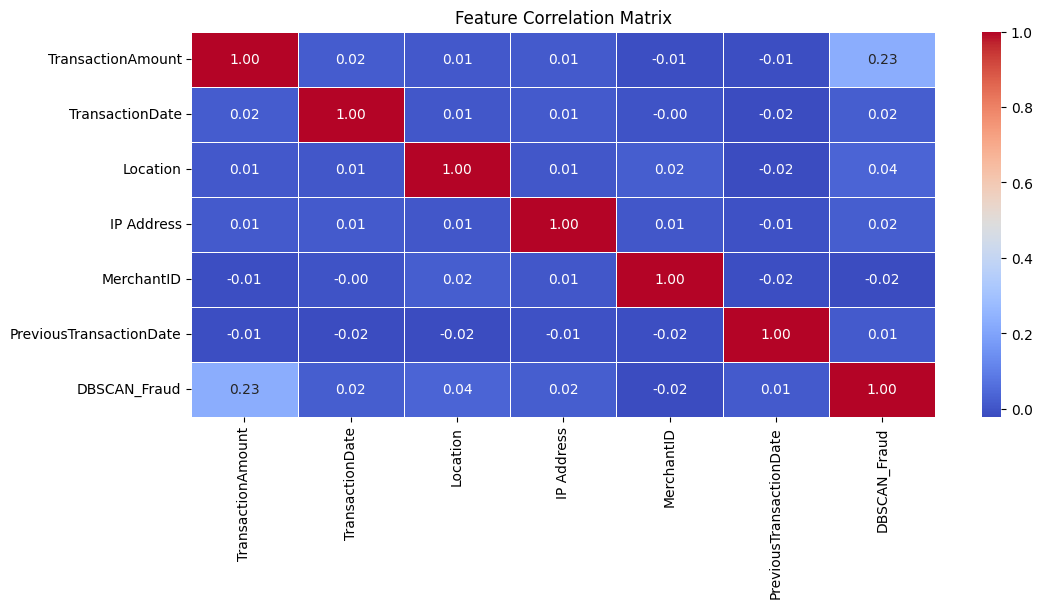

In [809]:
# Plot the HEAT MAP to visualize the correlation
plt.figure(figsize=(12, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

#### Splitting the dataset

In [810]:
# Assigning all columns except DBSCAN_Fraud to X (the features or independent variables)
X = dataNew.drop('DBSCAN_Fraud', axis = 1)

# Assigning the sales column to y (the target or dependent variable)
y = dataNew.DBSCAN_Fraud

### SMOTE - Balancing the dataset

In [811]:
from imblearn.over_sampling import SMOTE              # Import SMOTE from library
from sklearn.model_selection import train_test_split  # Importing the libraries for TRAIN and TEST Split

In [812]:
# creating synthetic samples for the minority class
sm = SMOTE(random_state=12)
x_SMOTE, y_SMOTE = sm.fit_resample(X, y)

In [813]:
x_SMOTE.shape, y_SMOTE.shape

((4982, 6), (4982,))

In [814]:
y_SMOTE.value_counts()

DBSCAN_Fraud
0    2491
1    2491
Name: count, dtype: int64

In [815]:
# Splitting the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(x_SMOTE, y_SMOTE, test_size = 0.2, random_state = 40)

### Model Building

In [816]:
# Import the Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
rf_smote = RandomForestClassifier()

In [817]:
# Fit the training data on Random Forest Classifier
rf_smote.fit(X_train, y_train)

RandomForestClassifier()

In [818]:
# Making Prediction on train data

X_train_pred_rf_smote = rf_smote.predict(X_train)

In [819]:
# Making Prediction on test data

X_test_pred_rf_smote = rf_smote.predict(X_test)

In [820]:
# Printing the score on Training data
from sklearn.metrics import precision_score, recall_score, f1_score

print("Training DATA Result for ( Random Forest + SMOTE )")
print("--"*25)

print(f"Precision : {precision_score(y_train, X_train_pred_rf_smote):.4f}")
print(f"Recall    : {recall_score(y_train, X_train_pred_rf_smote):.4f}")
print(f"F1-score  : {f1_score(y_train, X_train_pred_rf_smote):.4f}")

# Printing the score on Training data
print("Testing DATA Result for ( Random Forest + SMOTE )")
print("--"*25)

print(f"Precision : {precision_score(y_test, X_test_pred_rf_smote):.4f}")
print(f"Recall    : {recall_score(y_test, X_test_pred_rf_smote):.4f}")
print(f"F1-score  : {f1_score(y_test, X_test_pred_rf_smote):.4f}")


Training DATA Result for ( Random Forest + SMOTE )
--------------------------------------------------
Precision : 1.0000
Recall    : 1.0000
F1-score  : 1.0000
Testing DATA Result for ( Random Forest + SMOTE )
--------------------------------------------------
Precision : 0.9863
Recall    : 1.0000
F1-score  : 0.9931


**Key Insights**

- The **model is highly effective in detecting fraud** without missing any fraudulent cases (perfect recall), which is crucial for fraud detection.

- **Minor false positives exist** in the test data, reflected in slightly less than perfect precision (0.9863), but this is **acceptable** as it errs on the side of caution.

- The **extremely high F1-scores on both training and testing** datasets indicate a reliable model capable of balancing detection sensitivity and precision.

- The use of SMOTE likely helped handle class imbalance effectively, enabling the model to generalize well.

Overall, these metrics demonstrate a **strong, well-balanced fraud detection model** with minimal false negatives and very few false positives, essential characteristics for operational deployment in fraud prevention scenarios.

In [821]:
# Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, X_test_pred_rf_smote)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared (R2)
r2 = r2_score(y_test, X_test_pred_rf_smote)
print("R-squared:", r2)

Mean Squared Error: 0.007021063189568706
Root Mean Squared Error: 0.08379178473793661
R-squared: 0.9719123281496507


**The model performs exceptionally well:**

- The very low MSE and RMSE show **minimal error in predictions**.

- The high R² value demonstrates that the **model explains the vast majority of output variability**, confirming strong predictive power.

Overall, these metrics confirm a **highly accurate and reliable model** suitable for precise predictions in the given problem domain.

In [822]:
# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("\nRandom Forest Classification Report (based on DBSCAN labels):")
print(classification_report(y_test, X_test_pred_rf_smote))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, X_test_pred_rf_smote))


Random Forest Classification Report (based on DBSCAN labels):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       493
           1       0.99      1.00      0.99       504

    accuracy                           0.99       997
   macro avg       0.99      0.99      0.99       997
weighted avg       0.99      0.99      0.99       997


Confusion Matrix:
[[486   7]
 [  0 504]]


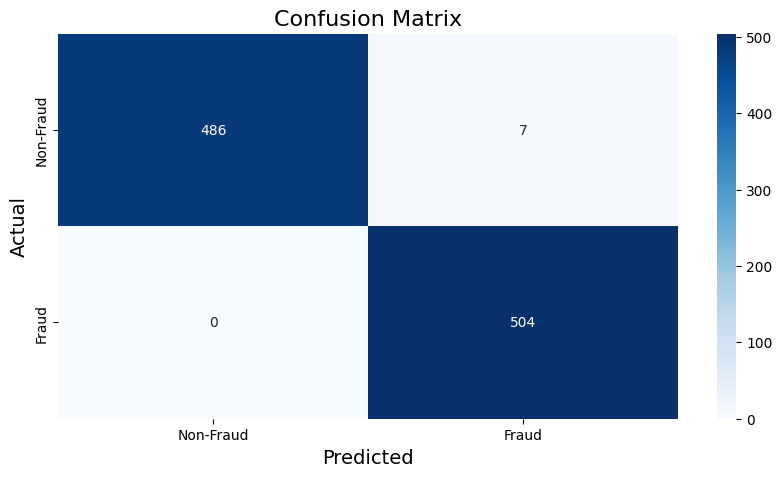

In [823]:
# Plot the Confusion Matrix obtained from Random Forest Classification Report (based on DBSCAN labels)

conf_matrix = confusion_matrix(y_test, X_test_pred_rf_smote)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.show()

Confusion matrix insights:

- **True Negatives (TN) = 486:** Correct prediction for negative (non-fraud) class.

- **False Positives (FP) = 7:** Incorrectly predicted as positive (fraud) when actually negative.

- **False Negatives (FN) = 0:** No missed positive cases; all actual frauds were detected.

- **True Positives (TP) = 504:** Correct prediction for positive (fraud) class.

## **CONCLUSION:**

- The model **did not miss any fraud cases** (FN = 0), indicating perfect recall/sensitivity for the positive class.

- There are **very few false alarms** (FP = 7), meaning the model **hardly misclassifies legitimate cases** as fraud.

- The high counts of TN and TP demonstrate **strong overall classification accuracy**.

- This matrix implies the model balances high sensitivity (recall) and high specificity, suitable for critical applications like fraud detection where missing fraud cases is costly.

Overall, this confusion matrix indicates the **model performs exceptionally well**, detecting all frauds while maintaining very low false positives, reflecting both reliability and practical applicability.

## New FRAUD Prediction Model based on (DBSCAN + Random Forest)

In [824]:
# ================================
# Function to predict new transaction as Fraud/Non-Fraud
# ================================
def predict_new_transaction(new_transaction: pd.DataFrame, rf_smote, le_dict, scaler=None):
    """
    Predict fraud/non-fraud for a new transaction using trained Random Forest.

    Parameters:
    - transaction (list or array): Feature values in order which was used in Training
      [TransactionAmount, TransactionDate, Location, IP Address, MerchantID, PreviousTransactionDate]
    - new_transaction: pd.DataFrame with one row (same columns as training features before encoding)
    - rf_model: Trained RandomForestClassifier
    - le_dict: Dictionary of fitted LabelEncoders for categorical columns
    - scaler: Optional scaler (if used in preprocessing)

    Returns:
    - Prediction: 'Fraud' or 'Non-Fraud'
    """
    # --- Convert datetime columns ---
    new_transaction['TransactionDate'] = pd.to_datetime(new_transaction['TransactionDate'])
    new_transaction['PreviousTransactionDate'] = pd.to_datetime(new_transaction['PreviousTransactionDate'])

    # --- Handle categorical encoding with pre-fitted LabelEncoders ---
    for col, le in le_dict.items():
        if col in new_transaction.columns:
            # map unknown categories safely
            new_transaction[col] = new_transaction[col].apply(lambda x: x if x in le.classes_ else le.classes_[0])
            new_transaction[col] = le.transform(new_transaction[col])

    # --- Drop irrelevant features (same as training) ---
    new_transaction = new_transaction[X.columns]   # Ensure same feature order as training

    # --- Make prediction ---
    prediction = rf_smote.predict(new_transaction)[0]

    return "Fraud Transaction !!!" if prediction == 1 else "Non-Fraud Transaction !!!"


# Build label encoders dictionary (from earlier preprocessing step)
le_dict = {}
for col in categorical_columns:
    le_enc = LabelEncoder()
    le_enc.fit(data[col])  # fit on original data categories
    le_dict[col] = le_enc


In [825]:
# New transaction details
sample_transaction = pd.DataFrame([{
    'TransactionAmount': 1250.75,
    'TransactionDate': '2025-08-27 14:32:00',
    'Location': 'Los Angeles',
    'IP Address': '192.168.1.25',
    'MerchantID': 'M050',
    'PreviousTransactionDate': '2025-08-26 16:20:00'
}])

# Run prediction
result = predict_new_transaction(sample_transaction, rf_smote, le_dict)
#print(f"Model Predicts that details for new transaction indicates it as: {result}")

print(f"Model Predicts that details for new transaction indicates it as: \033[1m{result}\033[0m")


Model Predicts that details for new transaction indicates it as: Non-Fraud Transaction !!!


In [ ]:
import joblib

# Assuming 'rf_smote' is the trained RandomForestClassifier and 'le_dict' label encoders dict
joblib.dump(rf_smote, 'rf_smote_model.pkl')
joblib.dump(le_dict, 'label_encoders.pkl')
